In [1]:
#Basic imports
import os
import uproot
import numpy as np
import awkward as ak
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
#Run through the ROOT files and return Info on the triggers
def create_dict(filelist):
    trigger_dict = {}
    for i, filename in enumerate(tqdm(filelist)):
        try:
            file = uproot.open(filename)
            for variable in file.keys():
                if 'L1_' not in variable: continue #Look for L1 triggers
                if '_L1_' in variable: continue    #Remove variables with L1 in the name but aren't triggers
                x = np.array(file[variable])
                x = np.multiply(x, 1)
                if i == 0:
                    trigger_dict[variable] = x
                else:
                    trigger_dict[variable] = np.append(trigger_dict[variable],x)
            file.close()
        except:
            print('File failed:{}'.format(filename))#Tell user which file is causing issues
    return trigger_dict

In [9]:
file = uproot.open('/work/submit/akanugan/SUEPCoffea_dask/2DDF51F7-C92C-054B-BB5A-D4B15ED279CA.root')
file['Events']


KeyInFileError: not found: 'Events' (with any cycle number)

    Available keys: 'mmtree;1', 'mmtree/tree;34', 'mmtree/tree;33'

in file /work/submit/akanugan/SUEPCoffea_dask/2DDF51F7-C92C-054B-BB5A-D4B15ED279CA.root

In [12]:
file = uproot.open('/work/submit/akanugan/SUEPCoffea_dask/2DDF51F7-C92C-054B-BB5A-D4B15ED279CA.root')
tree = file['mmtree;1']
print(tree.keys())

['tree;34', 'tree;33']


TypeError: expected a string, not <class 'uproot.reading.ReadOnlyDirectory'>

In [4]:
decay = 'generic'
files_125 = os.popen('xrdfs root://xrootd.cmsaf.mit.edu ls /store/user/paus/nanosu/A01/SUEP-m125-{}+RunIIAutumn18-private+MINIAODSIM'.format(decay)).readlines()
filelist_125 =  ['root://xrootd.cmsaf.mit.edu/{}:Events'.format(i.rstrip()) for i in files_125]
files_400 = os.popen('xrdfs root://xrootd.cmsaf.mit.edu ls /store/user/paus/nanosu/A01/SUEP-m400-{}+RunIIAutumn18-private+MINIAODSIM'.format(decay)).readlines()
filelist_400 =  ['root://xrootd.cmsaf.mit.edu/{}:Events'.format(i.rstrip()) for i in files_400]
files_750 = os.popen('xrdfs root://xrootd.cmsaf.mit.edu ls /store/user/paus/nanosu/A01/SUEP-m750-{}+RunIIAutumn18-private+MINIAODSIM'.format(decay)).readlines()
filelist_750 =  ['root://xrootd.cmsaf.mit.edu/{}:Events'.format(i.rstrip()) for i in files_750]
files_1000 = os.popen('xrdfs root://xrootd.cmsaf.mit.edu ls /store/user/paus/nanosu/A01/SUEP-m1000-{}+RunIIAutumn18-private+MINIAODSIM'.format(decay)).readlines()
filelist_1000 =  ['root://xrootd.cmsaf.mit.edu/{}:Events'.format(i.rstrip()) for i in files_1000]

test=[]

[FATAL] Auth failed: No protocols left to try
[FATAL] Auth failed: No protocols left to try
[FATAL] Auth failed: No protocols left to try
[FATAL] Auth failed: No protocols left to try


In [4]:
print('Processing m=125 GeV for the {} decay mode:'.format(decay))
trigger_dict_125 = create_dict(filelist_125)
print('Processing m=400 GeV for the {} decay mode:'.format(decay))
trigger_dict_400 = create_dict(filelist_400)
print('Processing m=750 GeV for the {} decay mode:'.format(decay))
trigger_dict_750 = create_dict(filelist_750)
print('Processing m=1000 GeV for the {} decay mode:'.format(decay))
trigger_dict_1000 = create_dict(filelist_1000)

Processing m=125 GeV for the generic decay mode:


100%|██████████| 99/99 [03:11<00:00,  1.94s/it]


Processing m=400 GeV for the generic decay mode:


100%|██████████| 99/99 [03:10<00:00,  1.92s/it]


Processing m=750 GeV for the generic decay mode:


100%|██████████| 100/100 [03:34<00:00,  2.14s/it]


Processing m=1000 GeV for the generic decay mode:


100%|██████████| 100/100 [03:12<00:00,  1.93s/it]


creating plots of trigger efficiencies.


  0%|          | 0/321 [00:00<?, ?it/s]

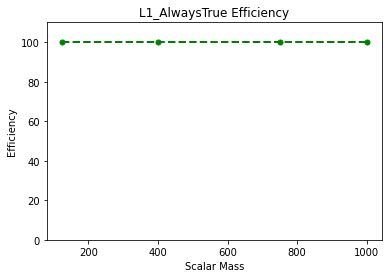

  0%|          | 1/321 [00:00<00:58,  5.48it/s]

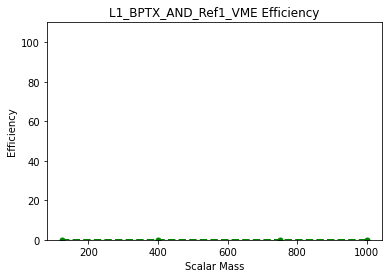

  1%|          | 2/321 [00:00<00:46,  6.82it/s]

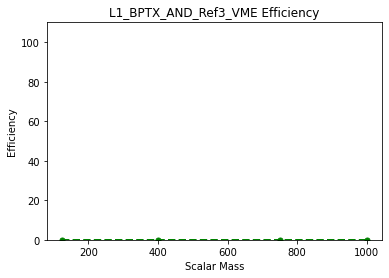

  1%|          | 3/321 [00:00<00:42,  7.54it/s]

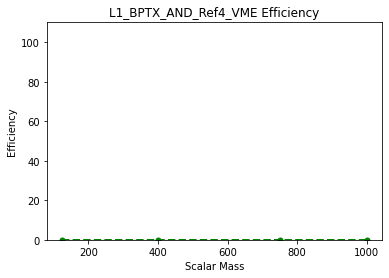

  1%|          | 4/321 [00:00<00:39,  7.93it/s]

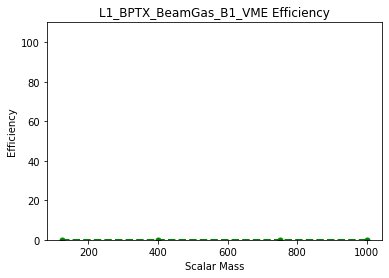

  2%|▏         | 5/321 [00:00<00:38,  8.14it/s]

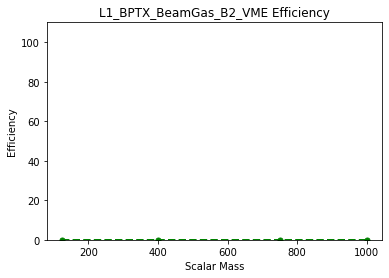

  2%|▏         | 6/321 [00:00<00:38,  8.26it/s]

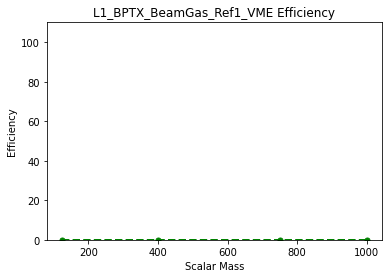

  2%|▏         | 7/321 [00:00<00:37,  8.34it/s]

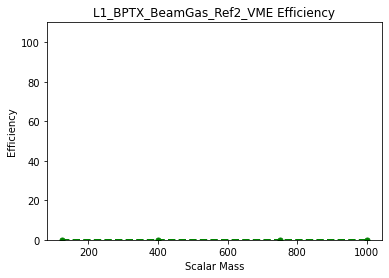

  2%|▏         | 8/321 [00:01<00:37,  8.41it/s]

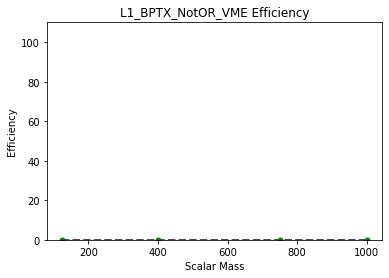

  3%|▎         | 9/321 [00:01<00:36,  8.49it/s]

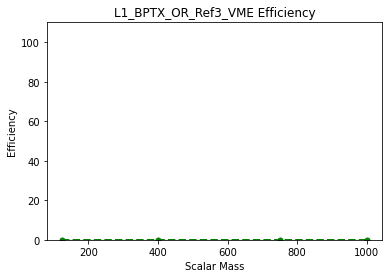

  3%|▎         | 10/321 [00:01<00:36,  8.55it/s]

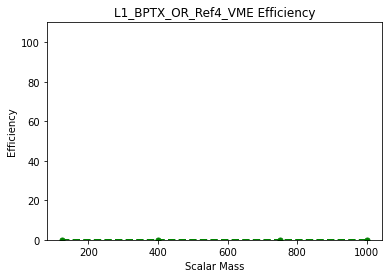

  3%|▎         | 11/321 [00:01<00:36,  8.58it/s]

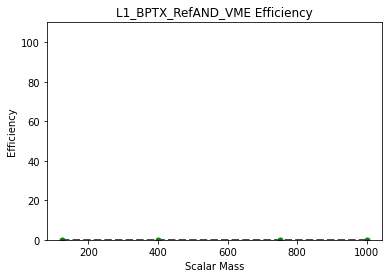

  4%|▎         | 12/321 [00:01<00:35,  8.62it/s]

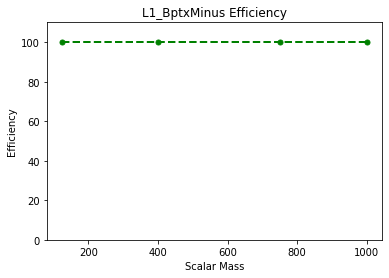

  4%|▍         | 13/321 [00:01<00:35,  8.64it/s]

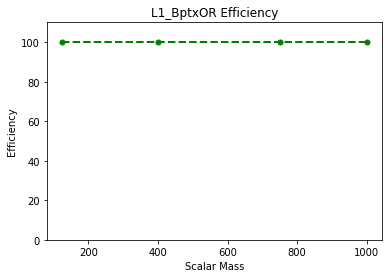

  4%|▍         | 14/321 [00:01<00:35,  8.70it/s]

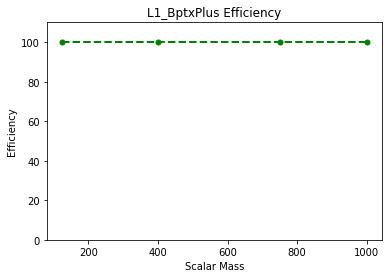

  5%|▍         | 15/321 [00:01<00:34,  8.74it/s]

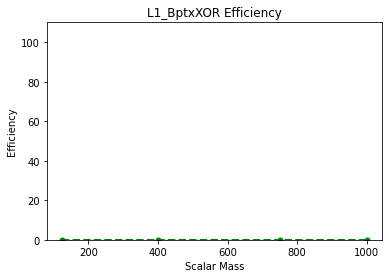

  5%|▍         | 16/321 [00:01<00:34,  8.79it/s]

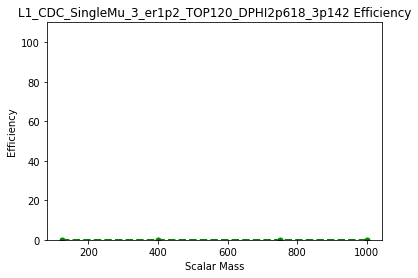

  5%|▌         | 17/321 [00:02<00:35,  8.51it/s]

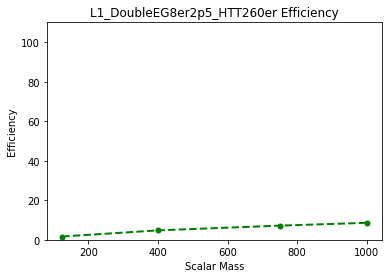

  6%|▌         | 18/321 [00:02<00:35,  8.46it/s]

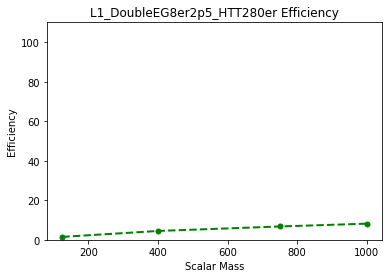

  6%|▌         | 19/321 [00:02<00:35,  8.43it/s]

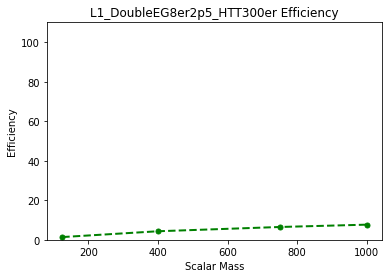

  6%|▌         | 20/321 [00:02<00:44,  6.75it/s]

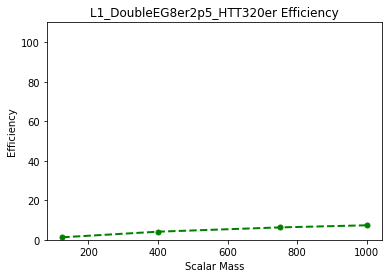

  7%|▋         | 21/321 [00:02<00:41,  7.19it/s]

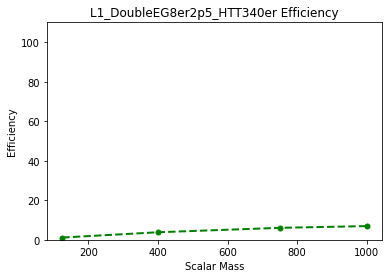

  7%|▋         | 22/321 [00:02<00:39,  7.50it/s]

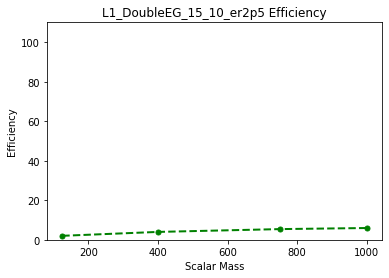

  7%|▋         | 23/321 [00:02<00:38,  7.78it/s]

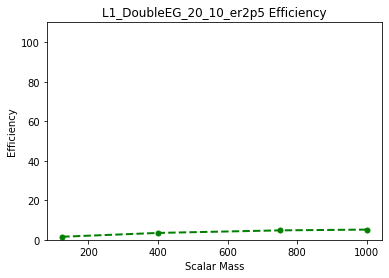

  7%|▋         | 24/321 [00:02<00:37,  7.99it/s]

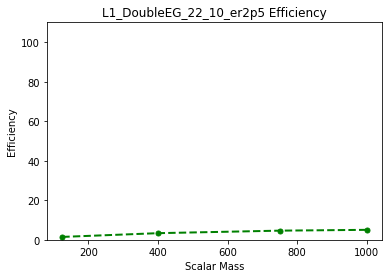

  8%|▊         | 25/321 [00:03<00:36,  8.14it/s]

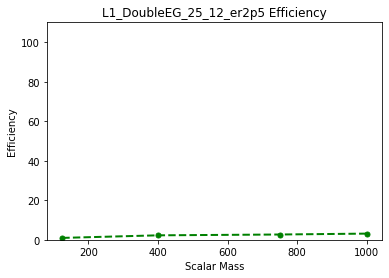

  8%|▊         | 26/321 [00:03<00:35,  8.25it/s]

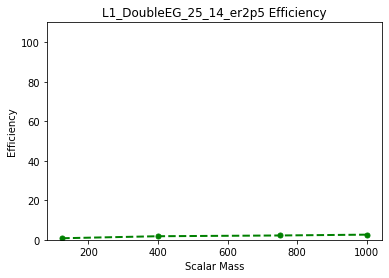

  8%|▊         | 27/321 [00:03<00:35,  8.31it/s]

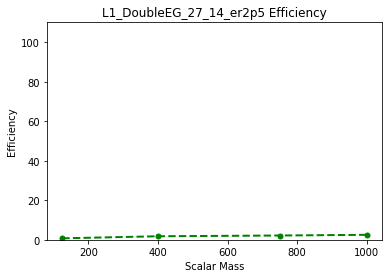

  9%|▊         | 28/321 [00:03<00:34,  8.37it/s]

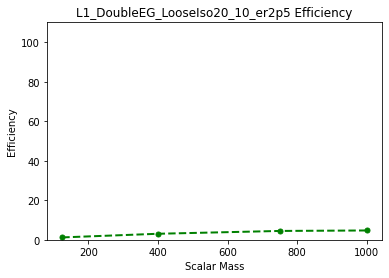

  9%|▉         | 29/321 [00:03<00:34,  8.36it/s]

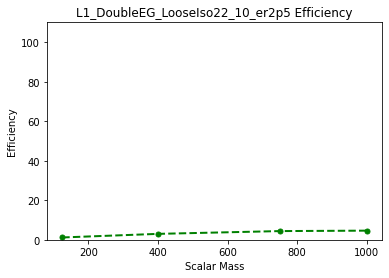

  9%|▉         | 30/321 [00:03<00:34,  8.35it/s]

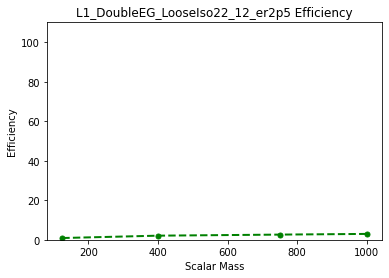

 10%|▉         | 31/321 [00:03<00:34,  8.36it/s]

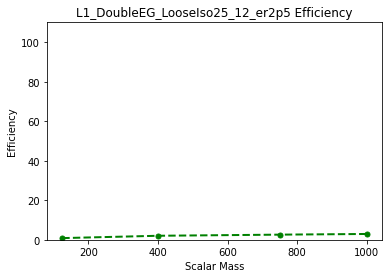

 10%|▉         | 32/321 [00:03<00:34,  8.37it/s]

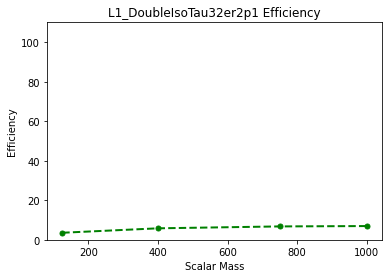

 10%|█         | 33/321 [00:04<00:34,  8.41it/s]

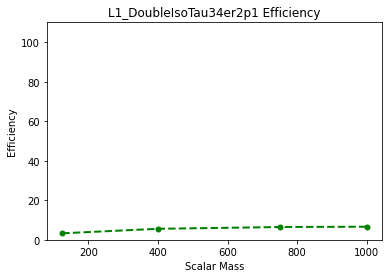

 11%|█         | 34/321 [00:04<00:33,  8.47it/s]

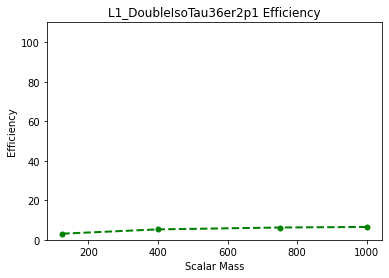

 11%|█         | 35/321 [00:04<00:33,  8.49it/s]

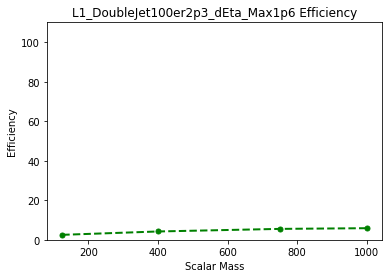

 11%|█         | 36/321 [00:04<00:33,  8.44it/s]

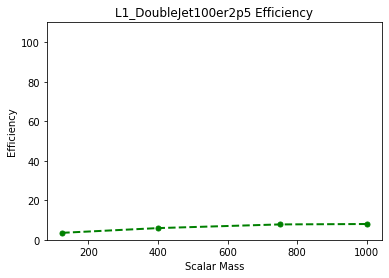

 12%|█▏        | 37/321 [00:04<00:33,  8.48it/s]

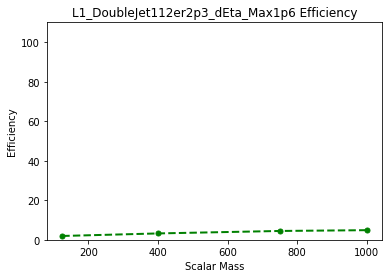

 12%|█▏        | 38/321 [00:04<00:33,  8.41it/s]

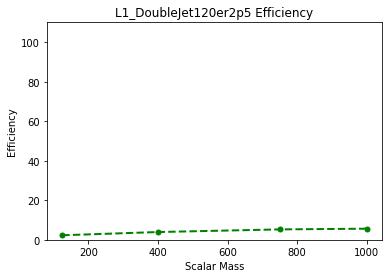

 12%|█▏        | 39/321 [00:04<00:33,  8.46it/s]

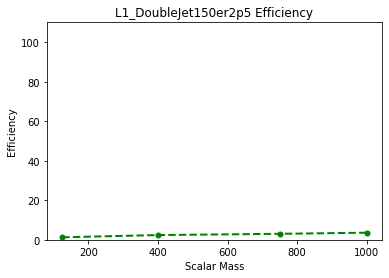

 12%|█▏        | 40/321 [00:04<00:33,  8.50it/s]

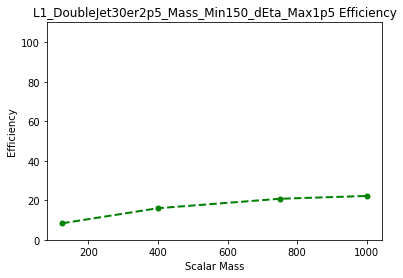

 13%|█▎        | 41/321 [00:04<00:33,  8.35it/s]

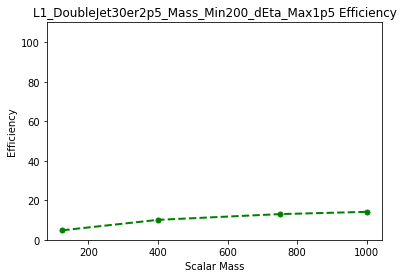

 13%|█▎        | 42/321 [00:05<00:33,  8.26it/s]

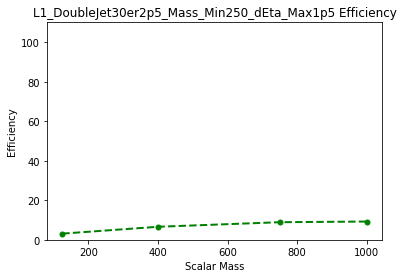

 13%|█▎        | 43/321 [00:05<00:33,  8.21it/s]

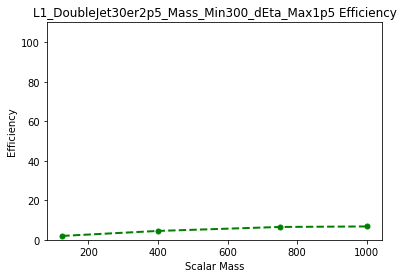

 14%|█▎        | 44/321 [00:05<00:33,  8.19it/s]

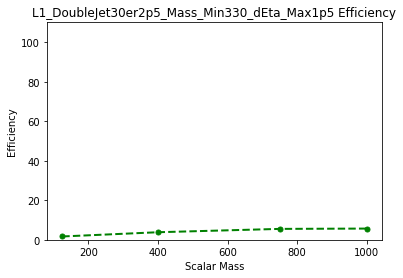

 14%|█▍        | 45/321 [00:05<00:41,  6.59it/s]

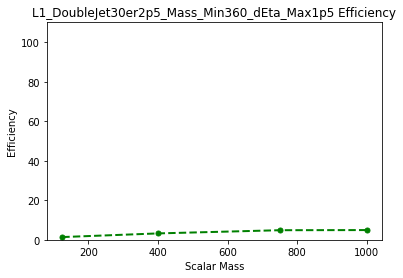

 14%|█▍        | 46/321 [00:05<00:39,  6.99it/s]

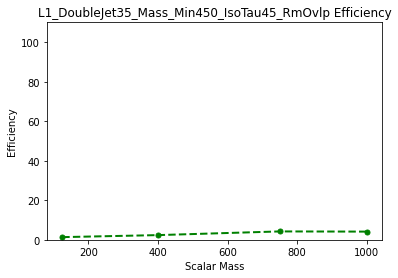

 15%|█▍        | 47/321 [00:05<00:37,  7.30it/s]

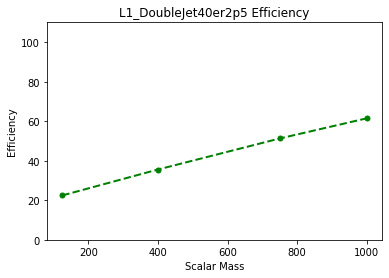

 15%|█▍        | 48/321 [00:05<00:35,  7.65it/s]

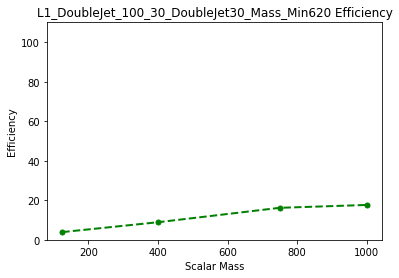

 15%|█▌        | 49/321 [00:06<00:35,  7.77it/s]

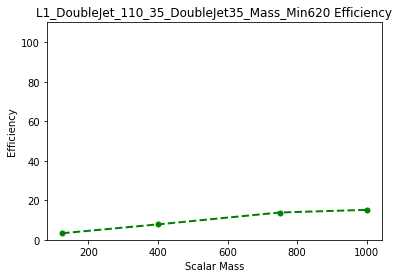

 16%|█▌        | 50/321 [00:06<00:34,  7.85it/s]

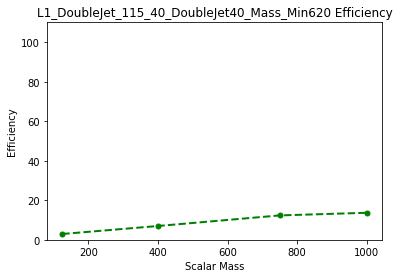

 16%|█▌        | 51/321 [00:06<00:34,  7.91it/s]

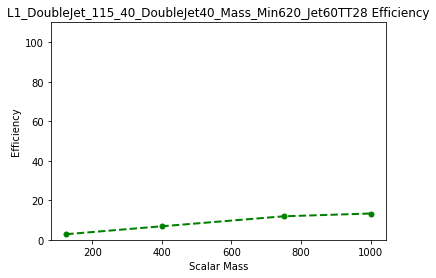

 16%|█▌        | 52/321 [00:06<00:34,  7.91it/s]

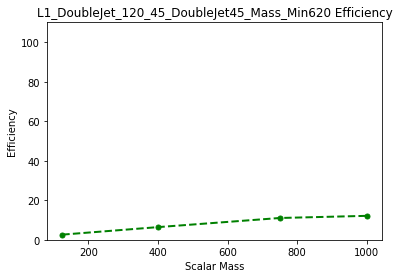

 17%|█▋        | 53/321 [00:06<00:33,  7.96it/s]

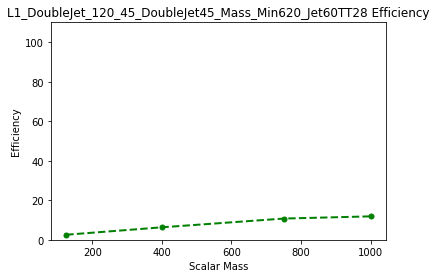

 17%|█▋        | 54/321 [00:06<00:33,  7.93it/s]

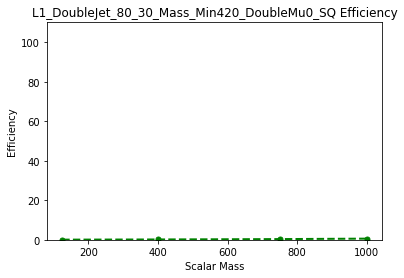

 17%|█▋        | 55/321 [00:06<00:33,  7.98it/s]

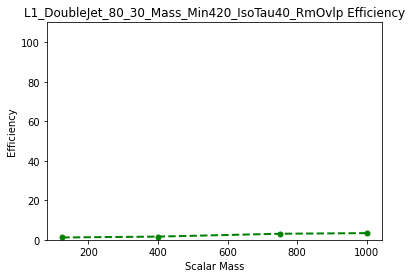

 17%|█▋        | 56/321 [00:06<00:33,  7.98it/s]

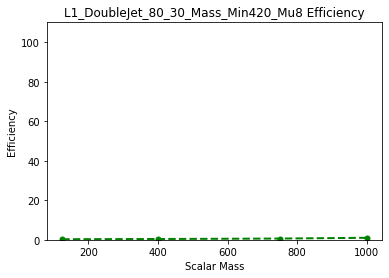

 18%|█▊        | 57/321 [00:07<00:32,  8.06it/s]

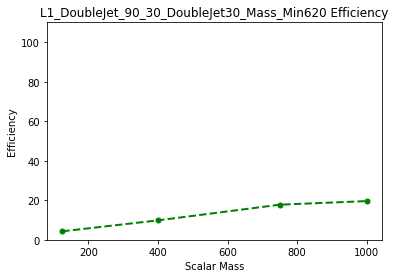

 18%|█▊        | 58/321 [00:07<00:32,  8.08it/s]

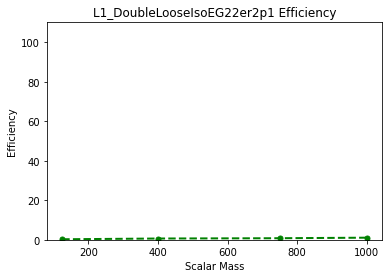

 18%|█▊        | 59/321 [00:07<00:32,  8.18it/s]

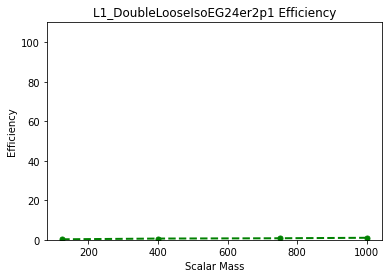

 19%|█▊        | 60/321 [00:07<00:31,  8.27it/s]

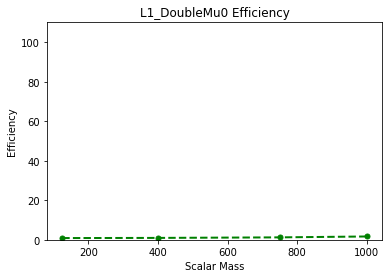

 19%|█▉        | 61/321 [00:07<00:30,  8.42it/s]

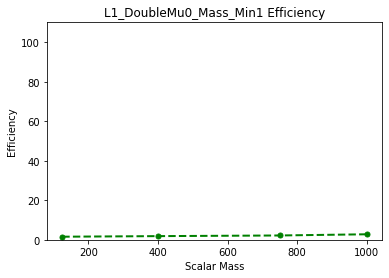

 19%|█▉        | 62/321 [00:07<00:30,  8.47it/s]

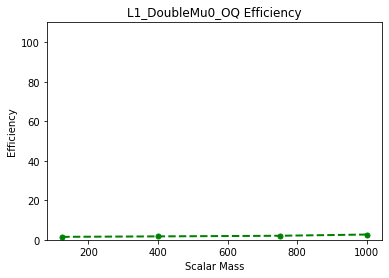

 20%|█▉        | 63/321 [00:07<00:30,  8.54it/s]

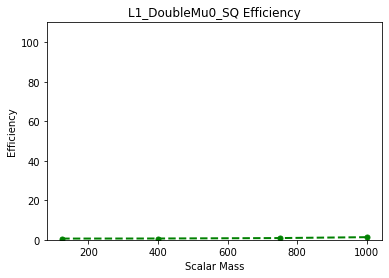

 20%|█▉        | 64/321 [00:07<00:29,  8.58it/s]

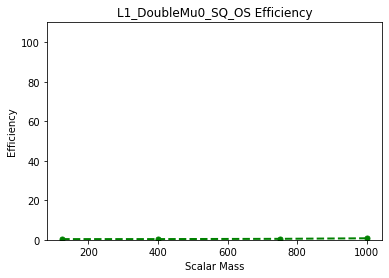

 20%|██        | 65/321 [00:07<00:29,  8.59it/s]

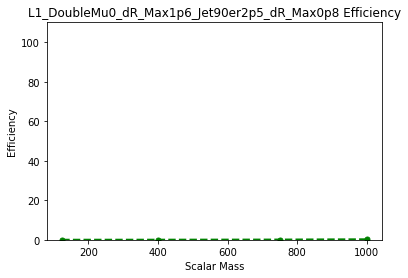

 21%|██        | 66/321 [00:08<00:30,  8.45it/s]

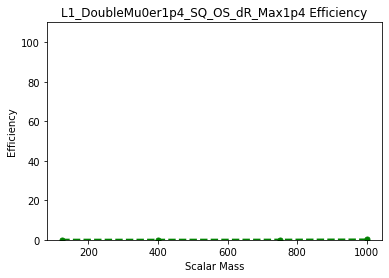

 21%|██        | 67/321 [00:08<00:30,  8.38it/s]

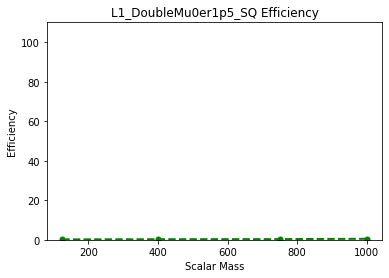

 21%|██        | 68/321 [00:08<00:29,  8.45it/s]

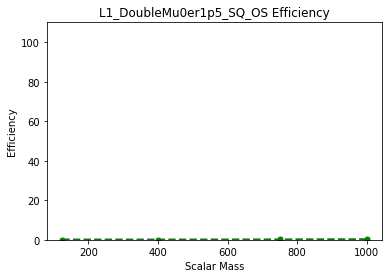

 21%|██▏       | 69/321 [00:08<00:29,  8.47it/s]

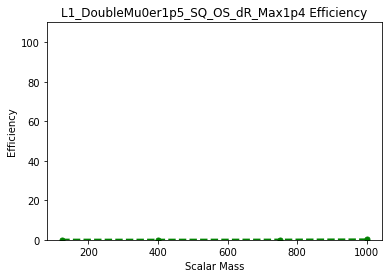

 22%|██▏       | 70/321 [00:08<00:37,  6.75it/s]

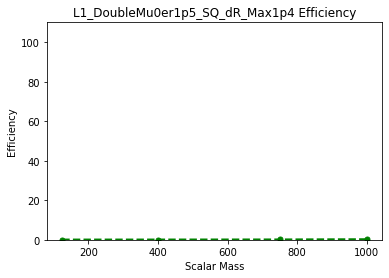

 22%|██▏       | 71/321 [00:08<00:34,  7.17it/s]

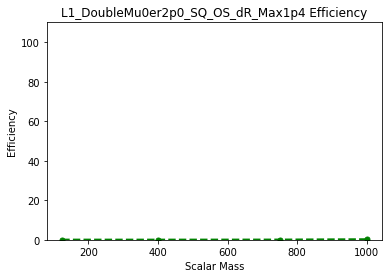

 22%|██▏       | 72/321 [00:08<00:33,  7.44it/s]

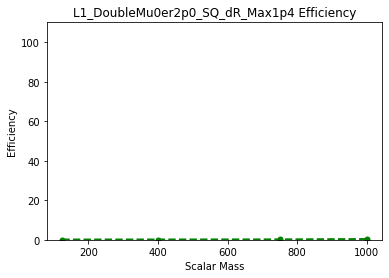

 23%|██▎       | 73/321 [00:09<00:32,  7.64it/s]

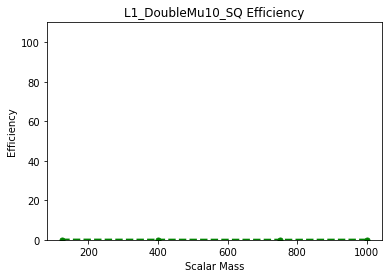

 23%|██▎       | 74/321 [00:09<00:31,  7.92it/s]

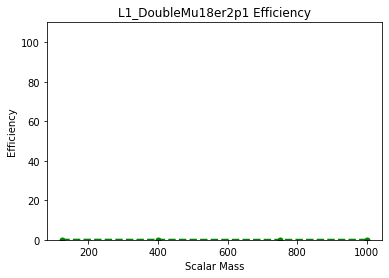

 23%|██▎       | 75/321 [00:09<00:30,  8.05it/s]

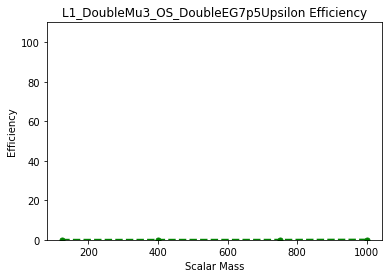

 24%|██▎       | 76/321 [00:09<00:30,  8.11it/s]

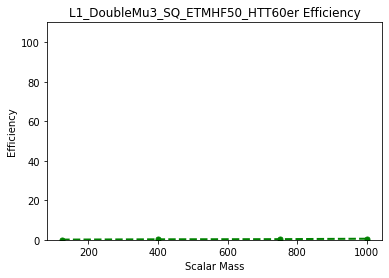

 24%|██▍       | 77/321 [00:09<00:29,  8.16it/s]

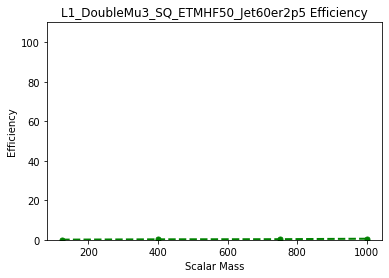

 24%|██▍       | 78/321 [00:09<00:29,  8.20it/s]

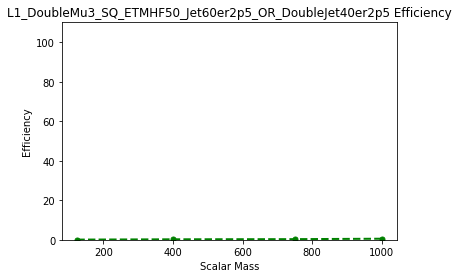

 25%|██▍       | 79/321 [00:09<00:29,  8.10it/s]

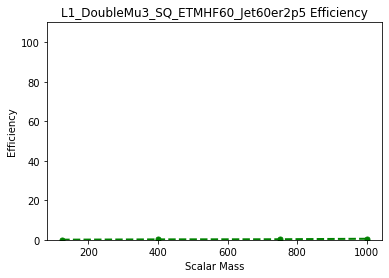

 25%|██▍       | 80/321 [00:09<00:29,  8.17it/s]

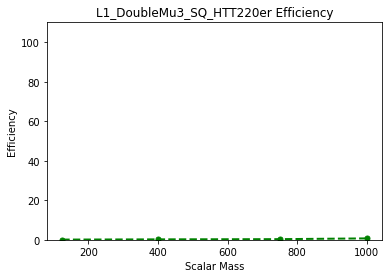

 25%|██▌       | 81/321 [00:10<00:29,  8.26it/s]

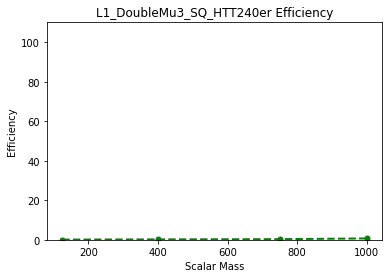

 26%|██▌       | 82/321 [00:10<00:28,  8.34it/s]

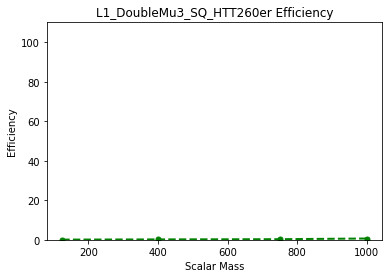

 26%|██▌       | 83/321 [00:10<00:28,  8.36it/s]

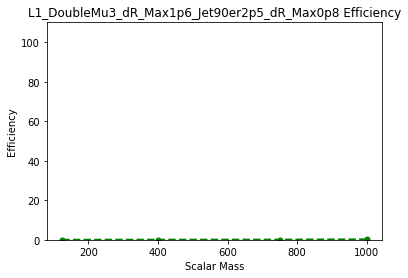

 26%|██▌       | 84/321 [00:10<00:28,  8.26it/s]

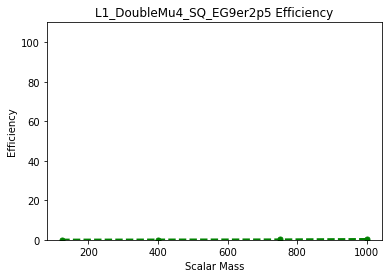

 26%|██▋       | 85/321 [00:10<00:28,  8.35it/s]

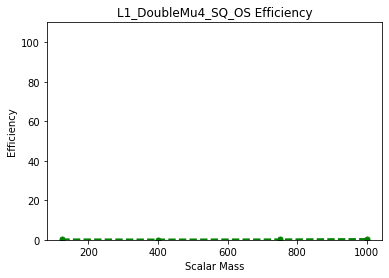

 27%|██▋       | 86/321 [00:10<00:27,  8.40it/s]

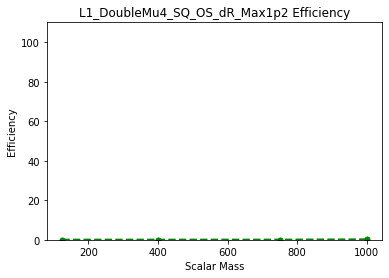

 27%|██▋       | 87/321 [00:10<00:27,  8.39it/s]

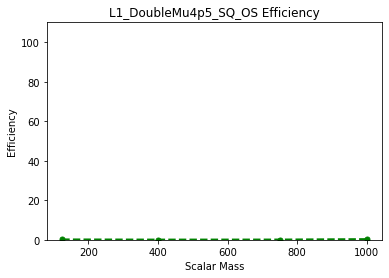

 27%|██▋       | 88/321 [00:10<00:27,  8.44it/s]

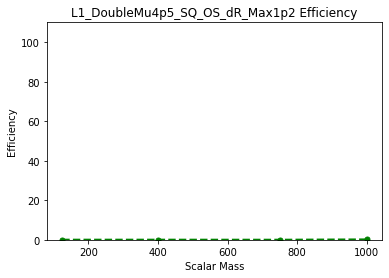

 28%|██▊       | 89/321 [00:10<00:27,  8.42it/s]

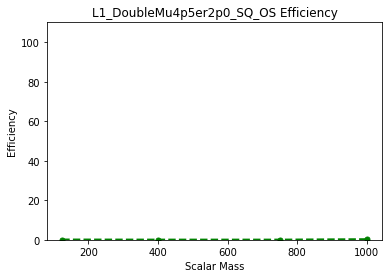

 28%|██▊       | 90/321 [00:11<00:27,  8.43it/s]

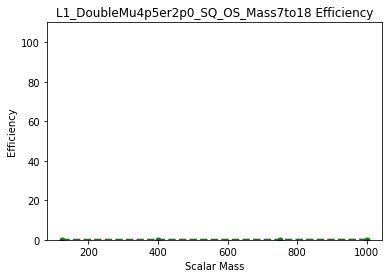

 28%|██▊       | 91/321 [00:11<00:27,  8.38it/s]

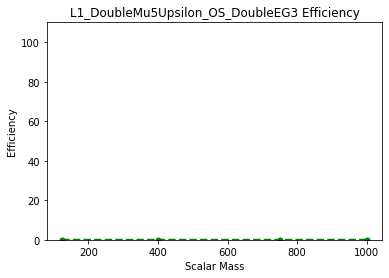

 29%|██▊       | 92/321 [00:11<00:27,  8.38it/s]

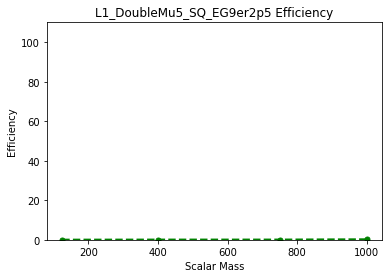

 29%|██▉       | 93/321 [00:11<00:27,  8.43it/s]

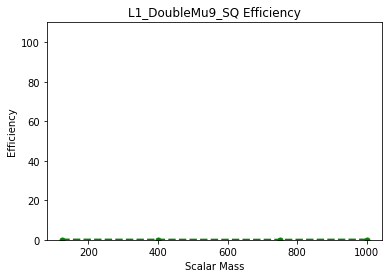

 29%|██▉       | 94/321 [00:11<00:26,  8.52it/s]

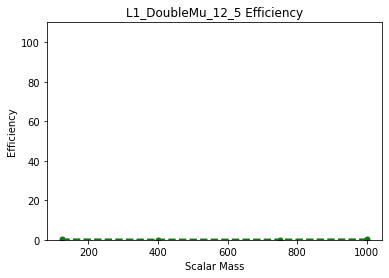

 30%|██▉       | 95/321 [00:11<00:33,  6.68it/s]

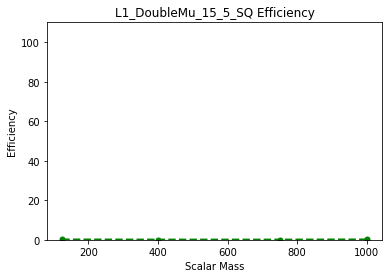

 30%|██▉       | 96/321 [00:11<00:31,  7.17it/s]

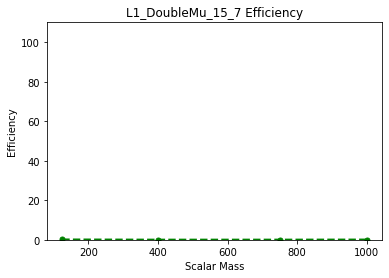

 30%|███       | 97/321 [00:12<00:29,  7.56it/s]

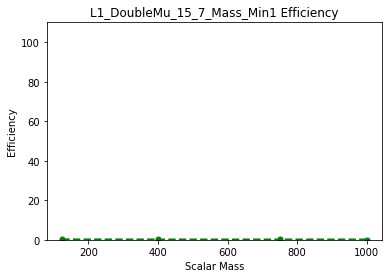

 31%|███       | 98/321 [00:12<00:28,  7.78it/s]

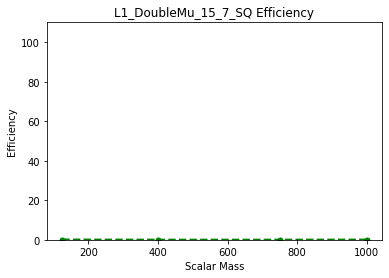

 31%|███       | 99/321 [00:12<00:27,  8.01it/s]

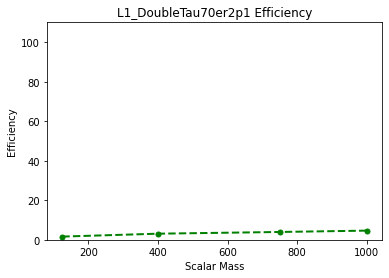

 31%|███       | 100/321 [00:12<00:27,  8.15it/s]

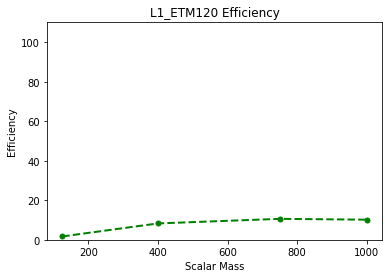

 31%|███▏      | 101/321 [00:12<00:26,  8.33it/s]

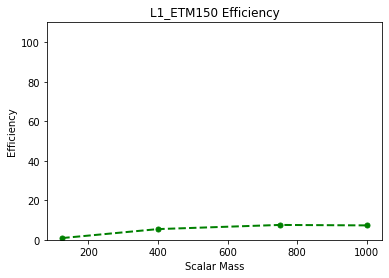

 32%|███▏      | 102/321 [00:12<00:25,  8.47it/s]

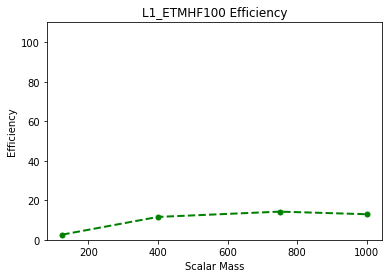

 32%|███▏      | 103/321 [00:12<00:25,  8.42it/s]

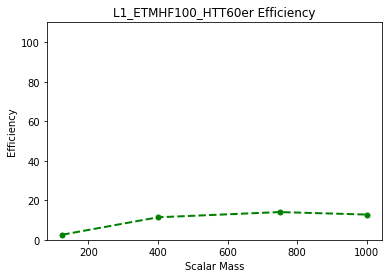

 32%|███▏      | 104/321 [00:12<00:25,  8.44it/s]

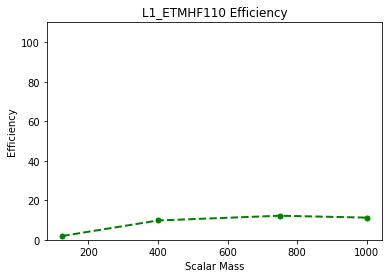

 33%|███▎      | 105/321 [00:12<00:25,  8.52it/s]

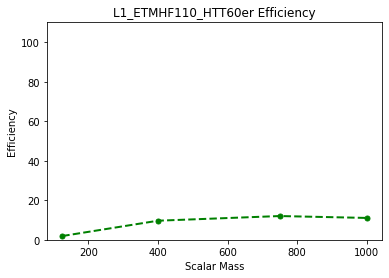

 33%|███▎      | 106/321 [00:13<00:25,  8.51it/s]

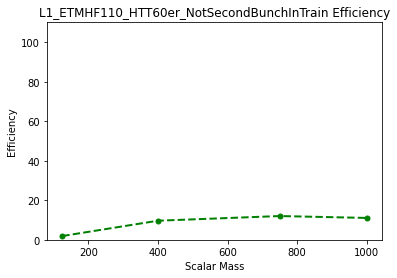

 33%|███▎      | 107/321 [00:13<00:25,  8.38it/s]

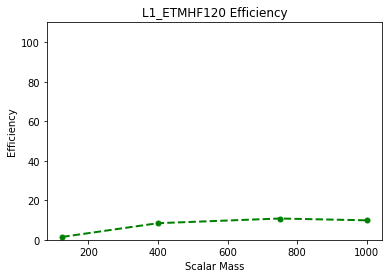

 34%|███▎      | 108/321 [00:13<00:25,  8.48it/s]

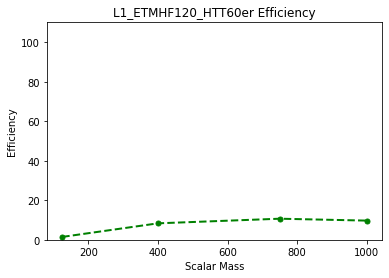

 34%|███▍      | 109/321 [00:13<00:24,  8.50it/s]

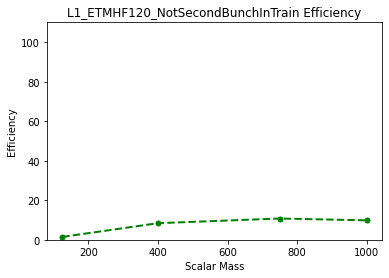

 34%|███▍      | 110/321 [00:13<00:25,  8.39it/s]

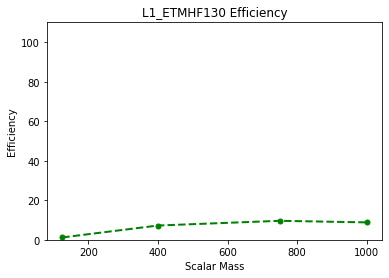

 35%|███▍      | 111/321 [00:13<00:24,  8.51it/s]

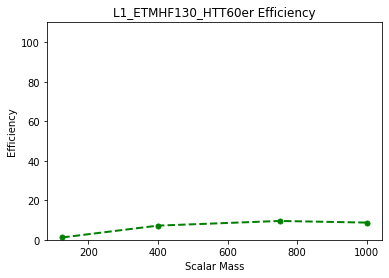

 35%|███▍      | 112/321 [00:13<00:24,  8.54it/s]

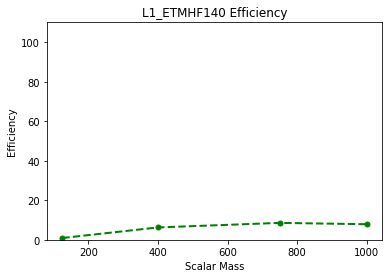

 35%|███▌      | 113/321 [00:13<00:24,  8.61it/s]

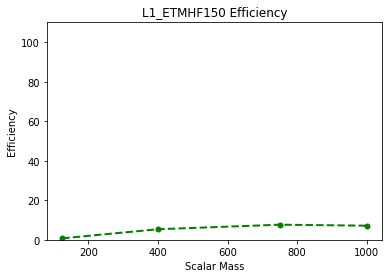

 36%|███▌      | 114/321 [00:14<00:23,  8.67it/s]

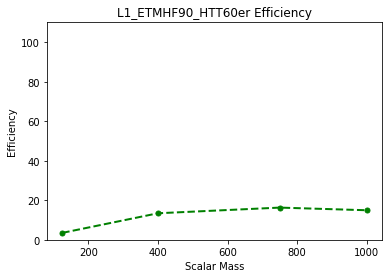

 36%|███▌      | 115/321 [00:14<00:23,  8.65it/s]

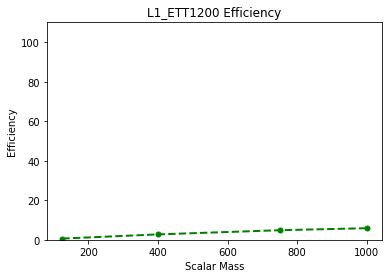

 36%|███▌      | 116/321 [00:14<00:23,  8.70it/s]

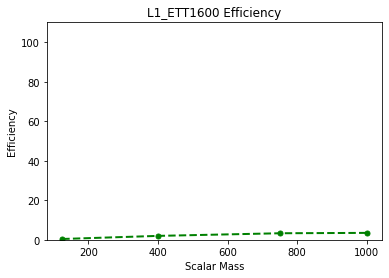

 36%|███▋      | 117/321 [00:14<00:23,  8.74it/s]

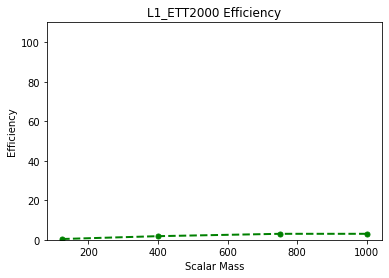

 37%|███▋      | 118/321 [00:14<00:23,  8.78it/s]

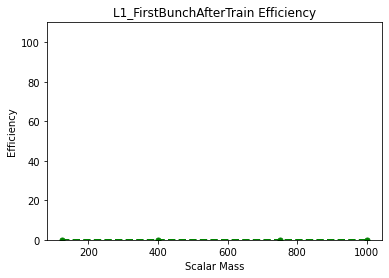

 37%|███▋      | 119/321 [00:14<00:23,  8.74it/s]

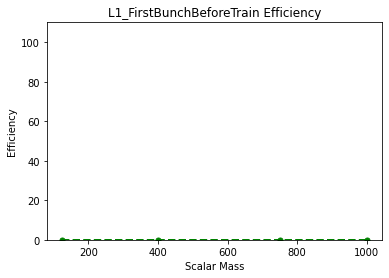

 37%|███▋      | 120/321 [00:14<00:29,  6.92it/s]

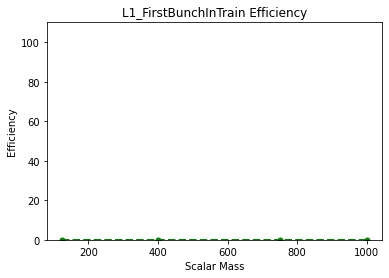

 38%|███▊      | 121/321 [00:14<00:27,  7.33it/s]

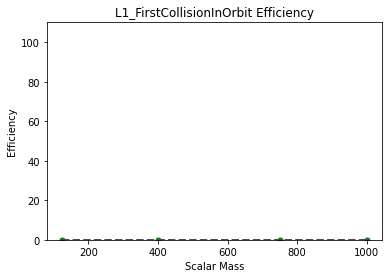

 38%|███▊      | 122/321 [00:15<00:26,  7.63it/s]

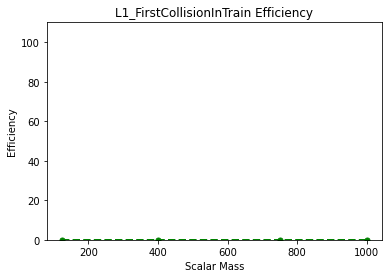

 38%|███▊      | 123/321 [00:15<00:25,  7.88it/s]

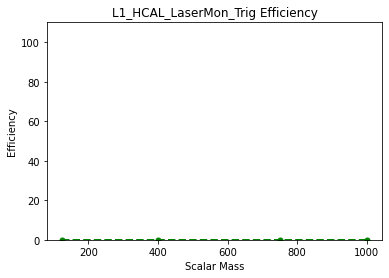

 39%|███▊      | 124/321 [00:15<00:24,  8.08it/s]

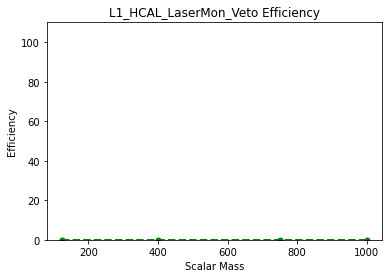

 39%|███▉      | 125/321 [00:15<00:23,  8.22it/s]

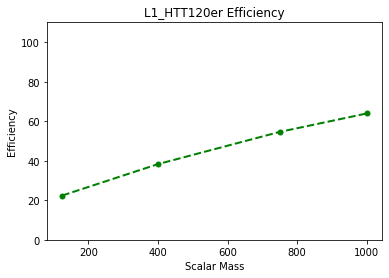

 39%|███▉      | 126/321 [00:15<00:23,  8.36it/s]

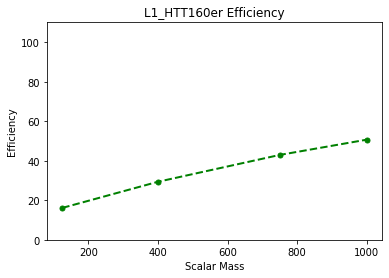

 40%|███▉      | 127/321 [00:15<00:22,  8.45it/s]

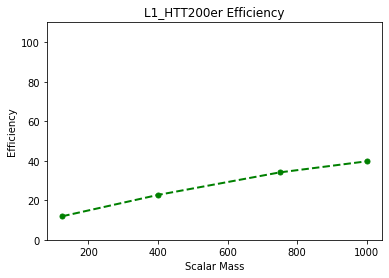

 40%|███▉      | 128/321 [00:15<00:22,  8.53it/s]

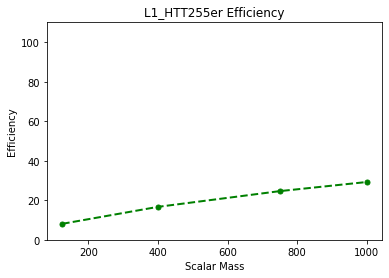

 40%|████      | 129/321 [00:15<00:22,  8.61it/s]

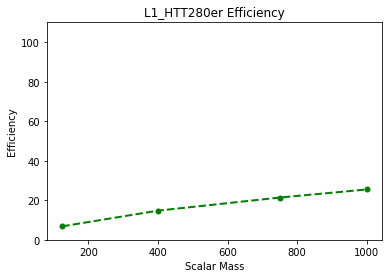

 40%|████      | 130/321 [00:15<00:22,  8.59it/s]

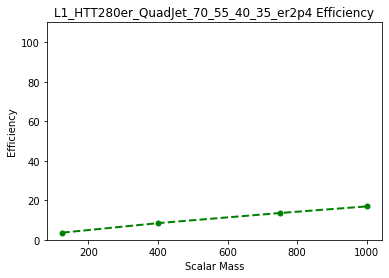

 41%|████      | 131/321 [00:16<00:22,  8.46it/s]

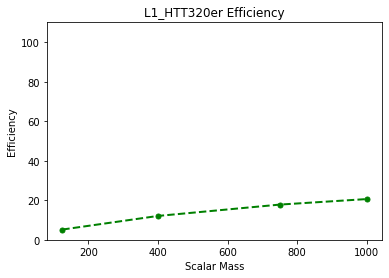

 41%|████      | 132/321 [00:16<00:22,  8.56it/s]

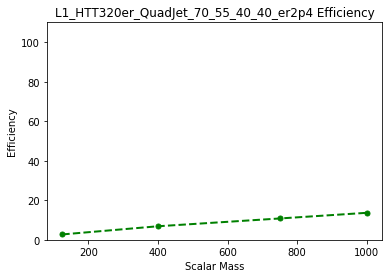

 41%|████▏     | 133/321 [00:16<00:22,  8.45it/s]

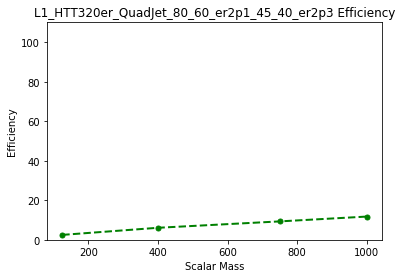

 42%|████▏     | 134/321 [00:16<00:22,  8.31it/s]

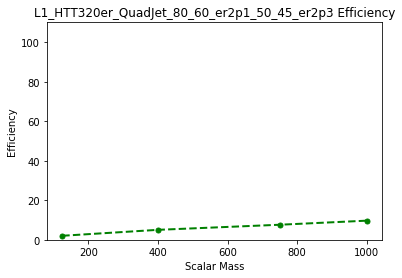

 42%|████▏     | 135/321 [00:16<00:22,  8.20it/s]

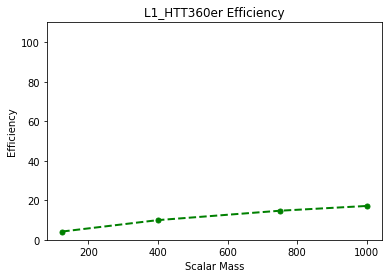

 42%|████▏     | 136/321 [00:16<00:22,  8.32it/s]

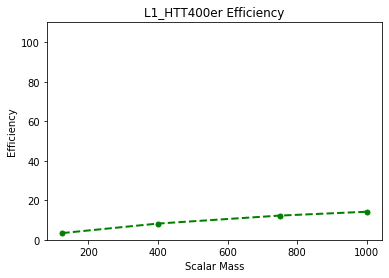

 43%|████▎     | 137/321 [00:16<00:25,  7.20it/s]

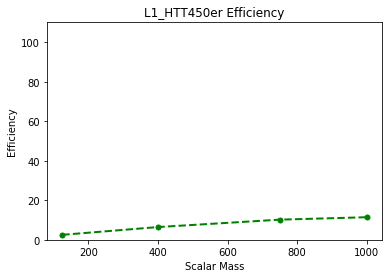

 43%|████▎     | 138/321 [00:17<00:28,  6.45it/s]

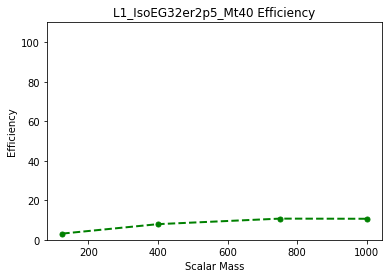

 43%|████▎     | 139/321 [00:17<00:26,  6.85it/s]

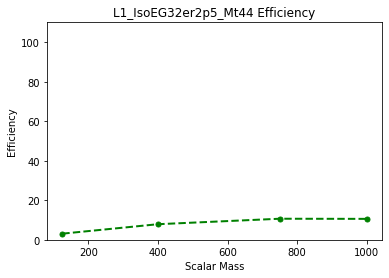

 44%|████▎     | 140/321 [00:17<00:24,  7.27it/s]

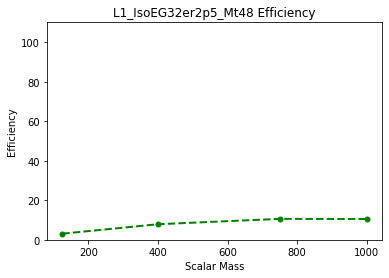

 44%|████▍     | 141/321 [00:17<00:23,  7.60it/s]

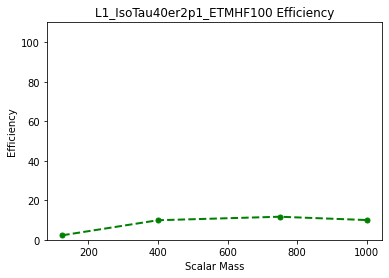

 44%|████▍     | 142/321 [00:17<00:22,  7.83it/s]

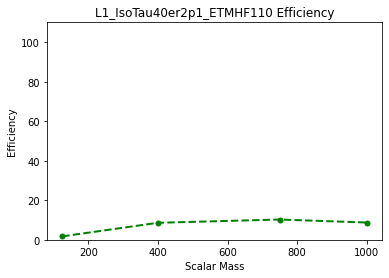

 45%|████▍     | 143/321 [00:17<00:22,  7.98it/s]

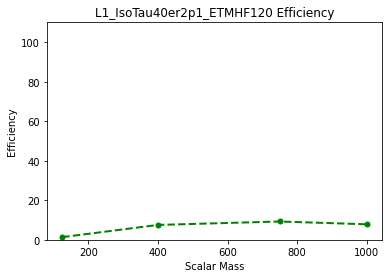

 45%|████▍     | 144/321 [00:17<00:21,  8.10it/s]

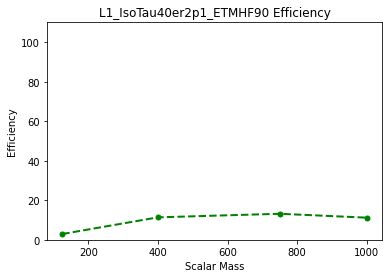

 45%|████▌     | 145/321 [00:17<00:26,  6.57it/s]

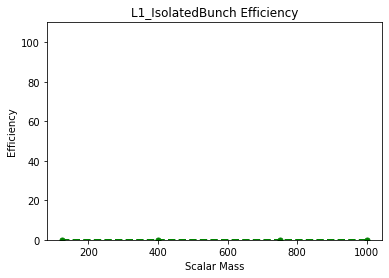

 45%|████▌     | 146/321 [00:18<00:24,  7.08it/s]

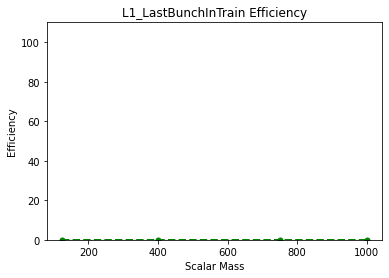

 46%|████▌     | 147/321 [00:18<00:23,  7.48it/s]

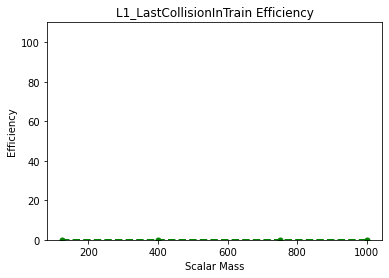

 46%|████▌     | 148/321 [00:18<00:22,  7.76it/s]

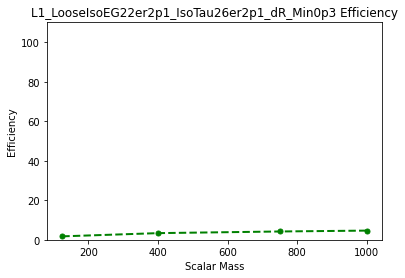

 46%|████▋     | 149/321 [00:18<00:21,  7.82it/s]

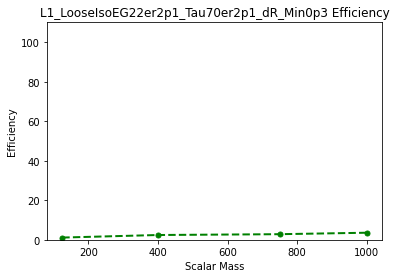

 47%|████▋     | 150/321 [00:18<00:21,  7.88it/s]

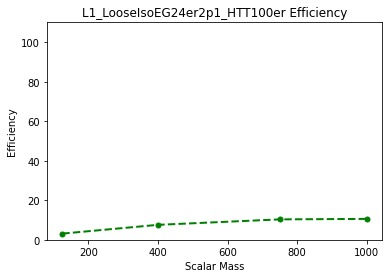

 47%|████▋     | 151/321 [00:18<00:21,  7.99it/s]

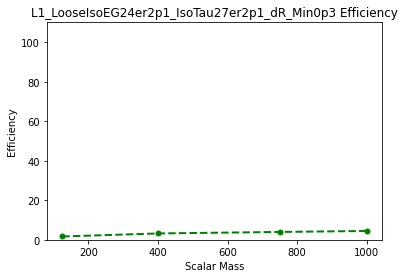

 47%|████▋     | 152/321 [00:18<00:21,  7.99it/s]

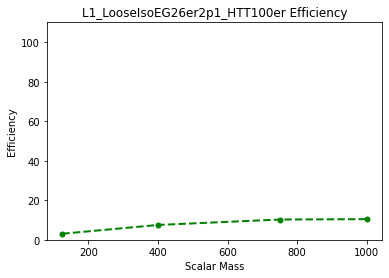

 48%|████▊     | 153/321 [00:18<00:20,  8.09it/s]

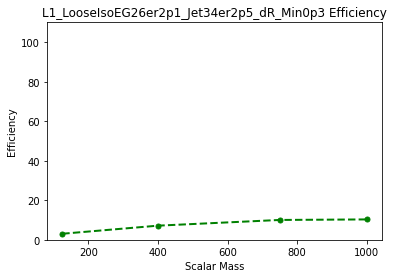

 48%|████▊     | 154/321 [00:19<00:20,  8.09it/s]

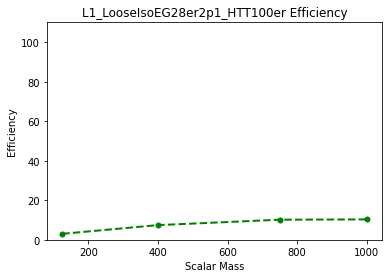

 48%|████▊     | 155/321 [00:19<00:20,  8.09it/s]

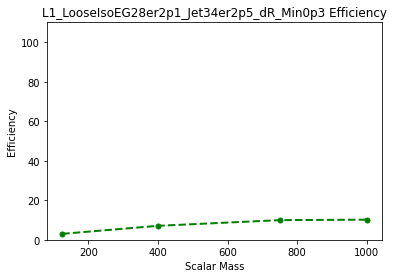

 49%|████▊     | 156/321 [00:19<00:20,  8.07it/s]

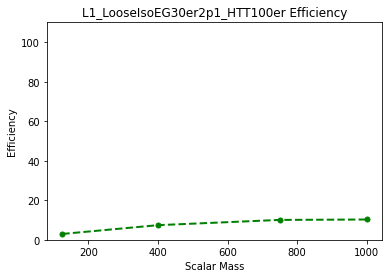

 49%|████▉     | 157/321 [00:19<00:20,  8.13it/s]

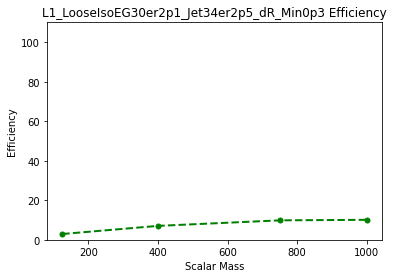

 49%|████▉     | 158/321 [00:19<00:20,  8.05it/s]

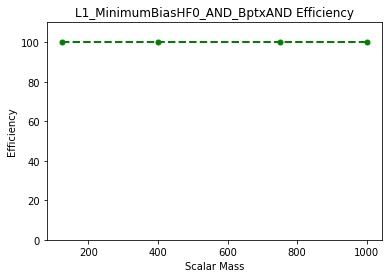

 50%|████▉     | 159/321 [00:19<00:19,  8.10it/s]

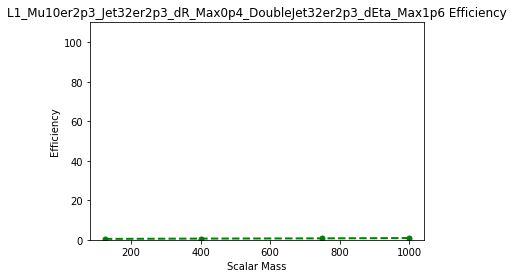

 50%|████▉     | 160/321 [00:19<00:20,  7.93it/s]

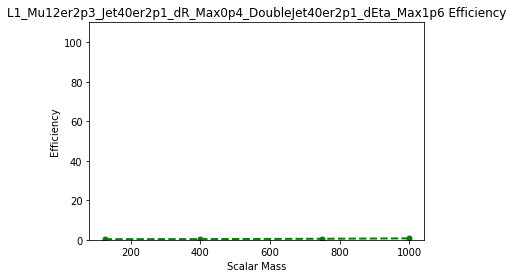

 50%|█████     | 161/321 [00:19<00:20,  7.82it/s]

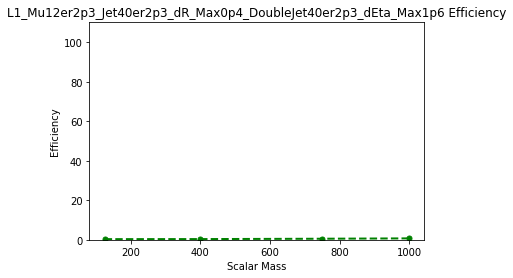

 50%|█████     | 162/321 [00:20<00:20,  7.77it/s]

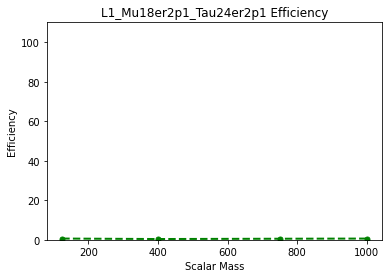

 51%|█████     | 163/321 [00:20<00:19,  7.95it/s]

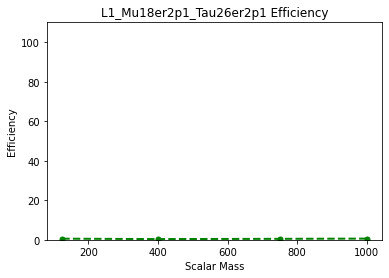

 51%|█████     | 164/321 [00:20<00:19,  8.11it/s]

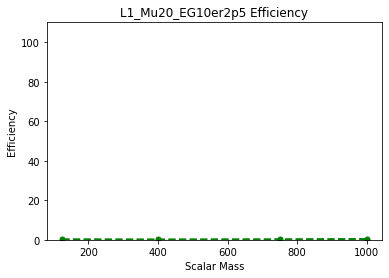

 51%|█████▏    | 165/321 [00:20<00:18,  8.25it/s]

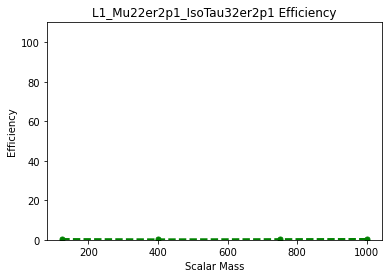

 52%|█████▏    | 166/321 [00:20<00:18,  8.29it/s]

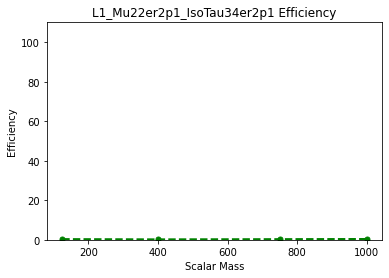

 52%|█████▏    | 167/321 [00:20<00:18,  8.31it/s]

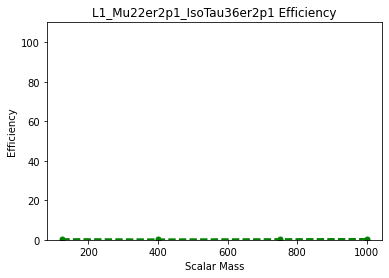

 52%|█████▏    | 168/321 [00:20<00:18,  8.31it/s]

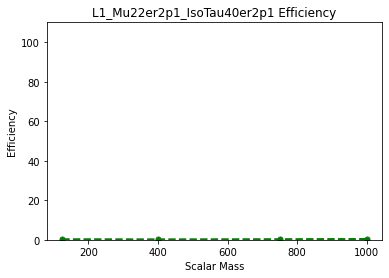

 53%|█████▎    | 169/321 [00:20<00:18,  8.32it/s]

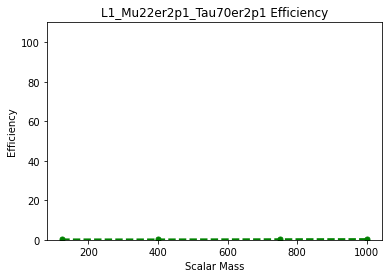

 53%|█████▎    | 170/321 [00:21<00:22,  6.67it/s]

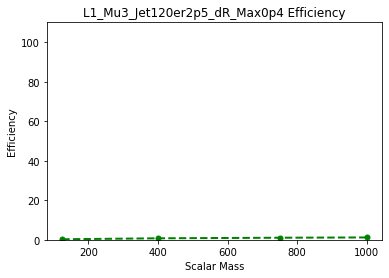

 53%|█████▎    | 171/321 [00:21<00:21,  7.10it/s]

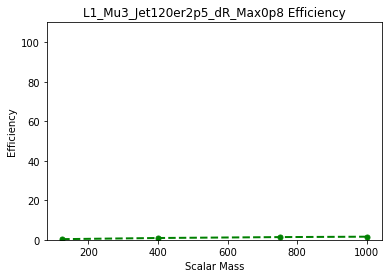

 54%|█████▎    | 172/321 [00:21<00:20,  7.42it/s]

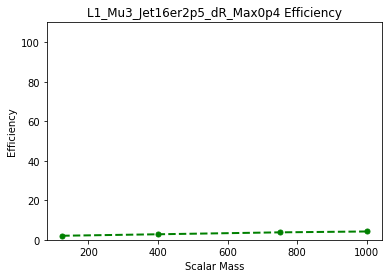

 54%|█████▍    | 173/321 [00:21<00:19,  7.67it/s]

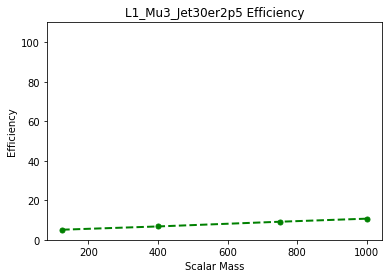

 54%|█████▍    | 174/321 [00:21<00:18,  7.90it/s]

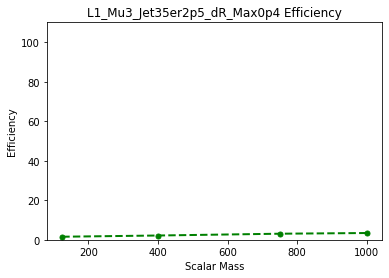

 55%|█████▍    | 175/321 [00:21<00:18,  8.03it/s]

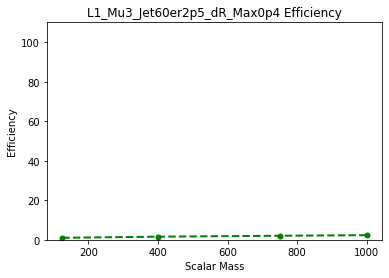

 55%|█████▍    | 176/321 [00:21<00:17,  8.13it/s]

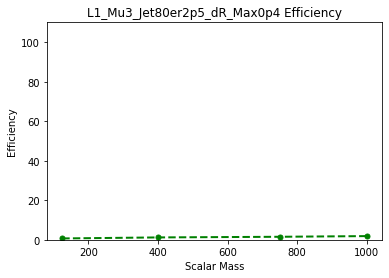

 55%|█████▌    | 177/321 [00:21<00:17,  8.16it/s]

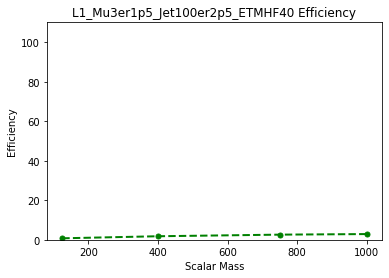

 55%|█████▌    | 178/321 [00:22<00:17,  8.17it/s]

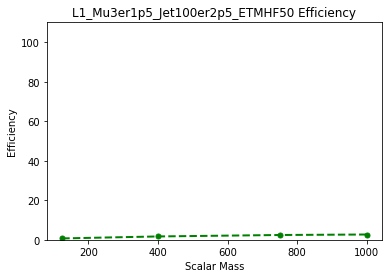

 56%|█████▌    | 179/321 [00:22<00:17,  8.20it/s]

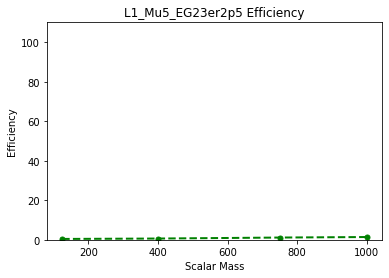

 56%|█████▌    | 180/321 [00:22<00:16,  8.29it/s]

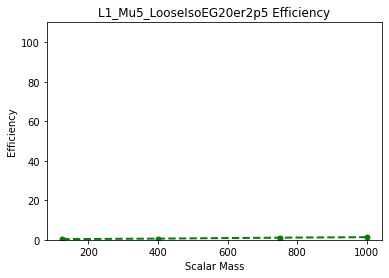

 56%|█████▋    | 181/321 [00:22<00:19,  7.02it/s]

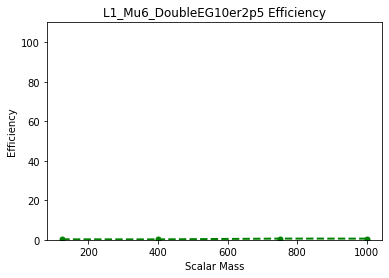

 57%|█████▋    | 182/321 [00:22<00:19,  7.29it/s]

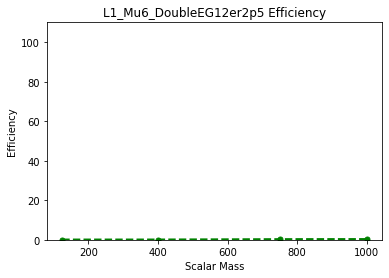

 57%|█████▋    | 183/321 [00:22<00:18,  7.53it/s]

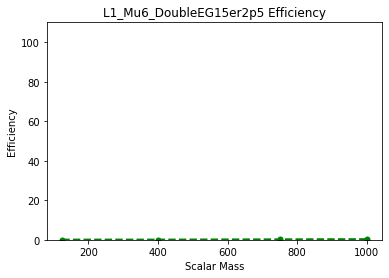

 57%|█████▋    | 184/321 [00:22<00:17,  7.73it/s]

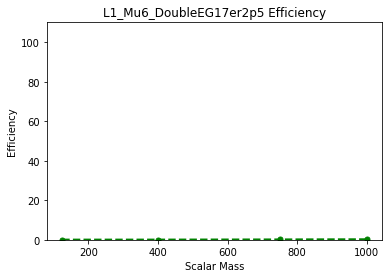

 58%|█████▊    | 185/321 [00:23<00:17,  7.88it/s]

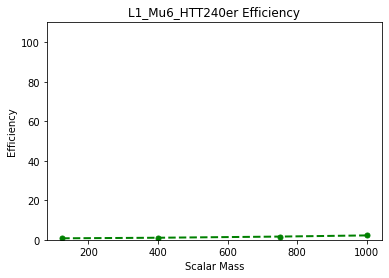

 58%|█████▊    | 186/321 [00:23<00:16,  8.07it/s]

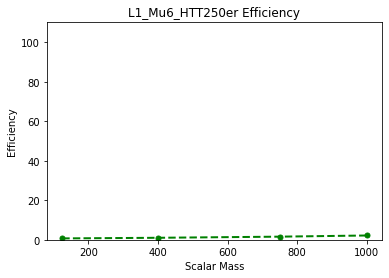

 58%|█████▊    | 187/321 [00:23<00:16,  8.17it/s]

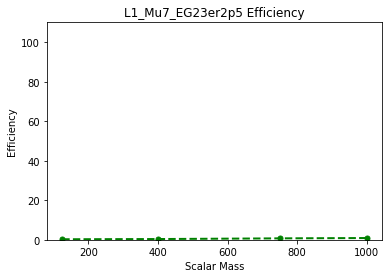

 59%|█████▊    | 188/321 [00:23<00:16,  8.23it/s]

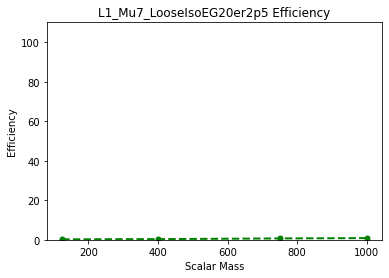

 59%|█████▉    | 189/321 [00:23<00:16,  8.23it/s]

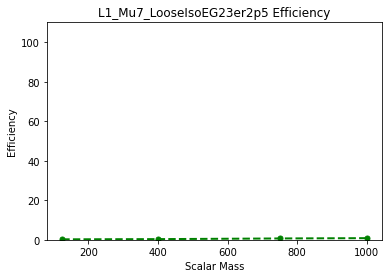

 59%|█████▉    | 190/321 [00:23<00:15,  8.22it/s]

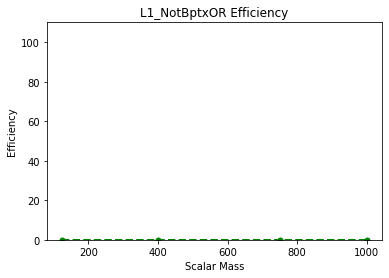

 60%|█████▉    | 191/321 [00:23<00:15,  8.27it/s]

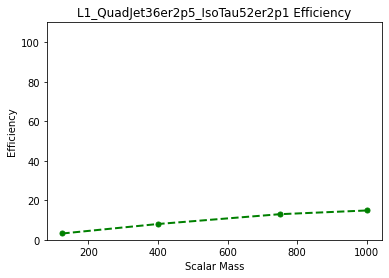

 60%|█████▉    | 192/321 [00:23<00:15,  8.16it/s]

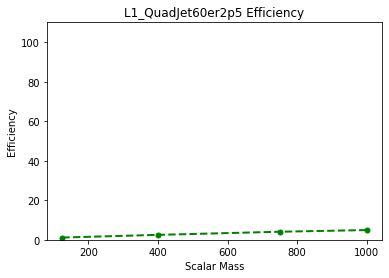

 60%|██████    | 193/321 [00:23<00:15,  8.19it/s]

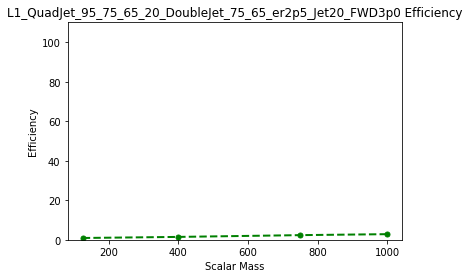

 60%|██████    | 194/321 [00:24<00:15,  7.95it/s]

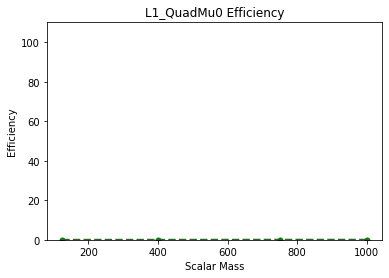

 61%|██████    | 195/321 [00:24<00:19,  6.57it/s]

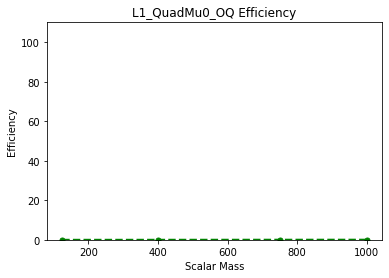

 61%|██████    | 196/321 [00:24<00:17,  7.07it/s]

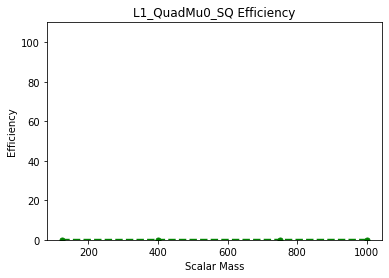

 61%|██████▏   | 197/321 [00:24<00:16,  7.47it/s]

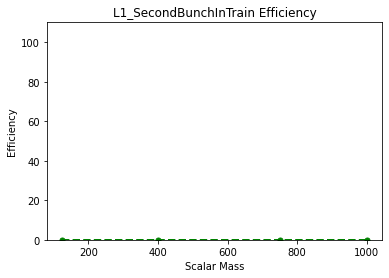

 62%|██████▏   | 198/321 [00:24<00:15,  7.74it/s]

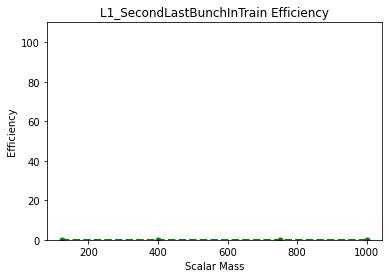

 62%|██████▏   | 199/321 [00:24<00:15,  7.93it/s]

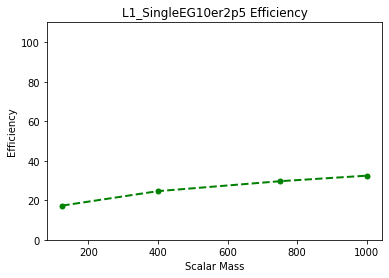

 62%|██████▏   | 200/321 [00:24<00:14,  8.08it/s]

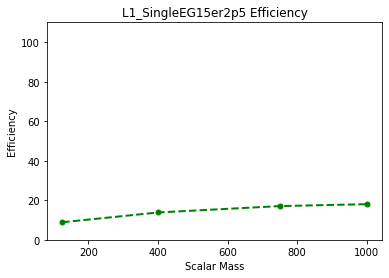

 63%|██████▎   | 201/321 [00:25<00:14,  8.19it/s]

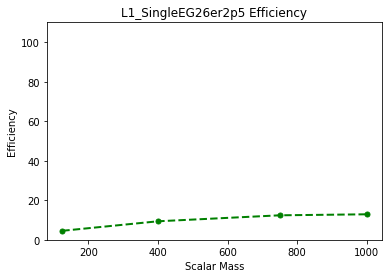

 63%|██████▎   | 202/321 [00:25<00:14,  8.26it/s]

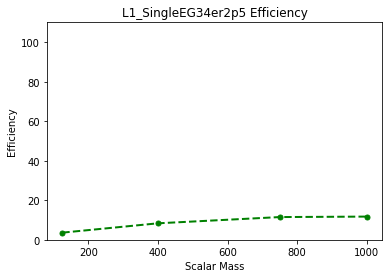

 63%|██████▎   | 203/321 [00:25<00:14,  8.28it/s]

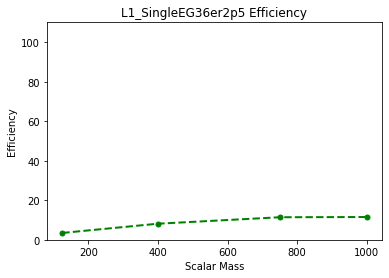

 64%|██████▎   | 204/321 [00:25<00:14,  8.32it/s]

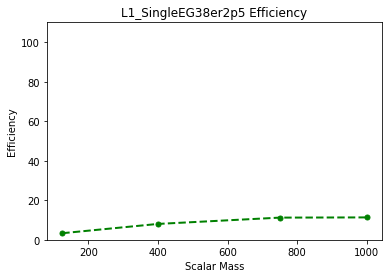

 64%|██████▍   | 205/321 [00:25<00:13,  8.35it/s]

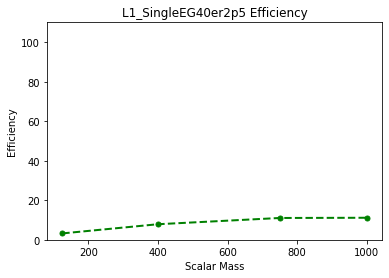

 64%|██████▍   | 206/321 [00:25<00:13,  8.37it/s]

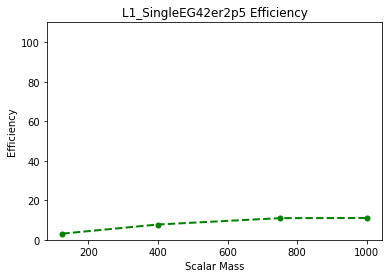

 64%|██████▍   | 207/321 [00:25<00:13,  8.36it/s]

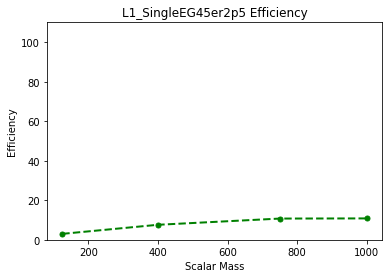

 65%|██████▍   | 208/321 [00:25<00:13,  8.38it/s]

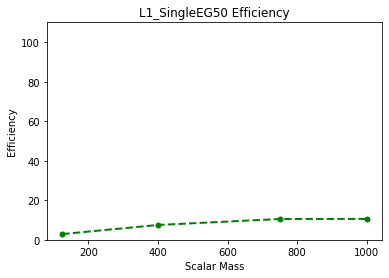

 65%|██████▌   | 209/321 [00:25<00:13,  8.43it/s]

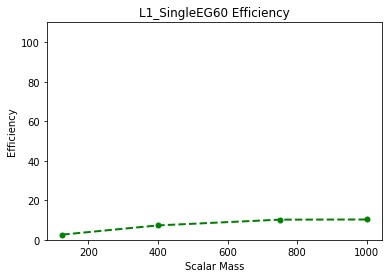

 65%|██████▌   | 210/321 [00:26<00:13,  8.43it/s]

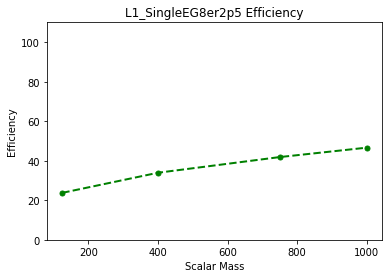

 66%|██████▌   | 211/321 [00:26<00:13,  8.44it/s]

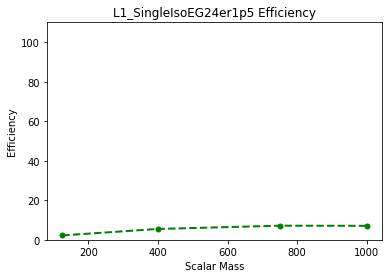

 66%|██████▌   | 212/321 [00:26<00:12,  8.40it/s]

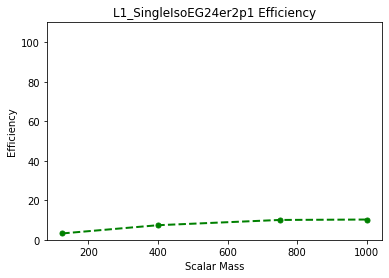

 66%|██████▋   | 213/321 [00:26<00:12,  8.41it/s]

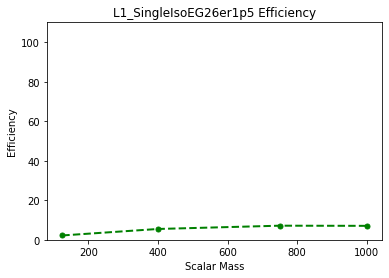

 67%|██████▋   | 214/321 [00:26<00:12,  8.39it/s]

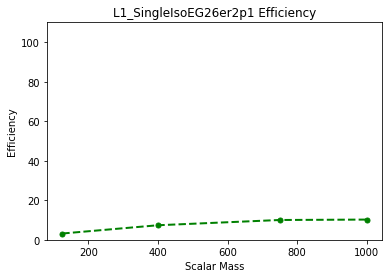

 67%|██████▋   | 215/321 [00:26<00:12,  8.37it/s]

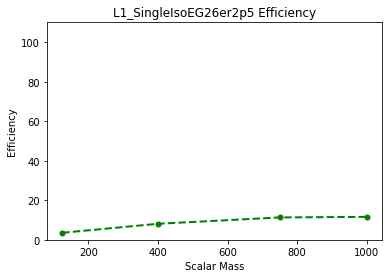

 67%|██████▋   | 216/321 [00:26<00:12,  8.37it/s]

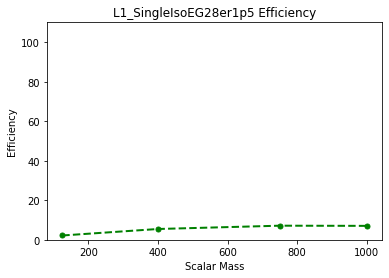

 68%|██████▊   | 217/321 [00:26<00:12,  8.39it/s]

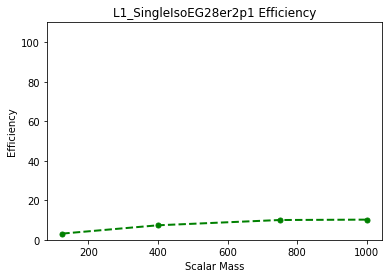

 68%|██████▊   | 218/321 [00:27<00:12,  8.41it/s]

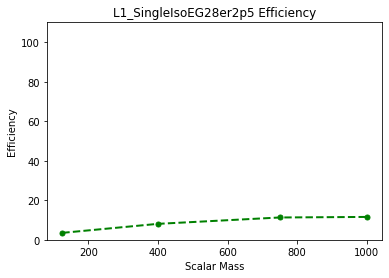

 68%|██████▊   | 219/321 [00:27<00:12,  8.42it/s]

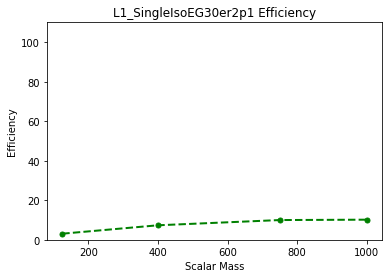

 69%|██████▊   | 220/321 [00:27<00:15,  6.73it/s]

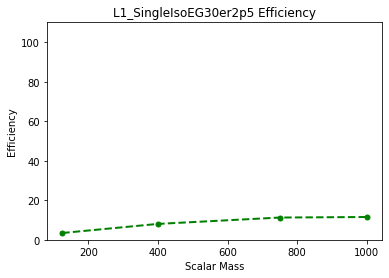

 69%|██████▉   | 221/321 [00:27<00:14,  7.14it/s]

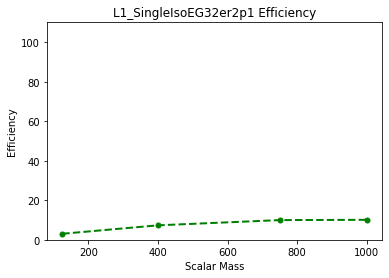

 69%|██████▉   | 222/321 [00:27<00:13,  7.45it/s]

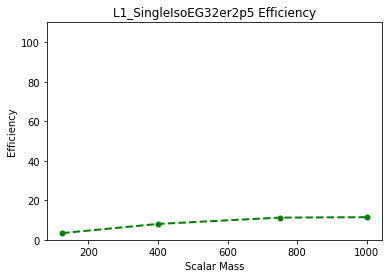

 69%|██████▉   | 223/321 [00:27<00:12,  7.71it/s]

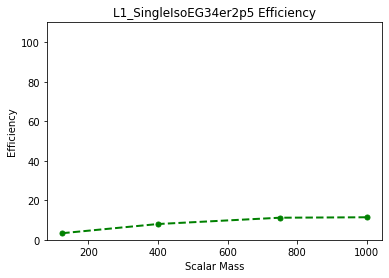

 70%|██████▉   | 224/321 [00:27<00:12,  7.90it/s]

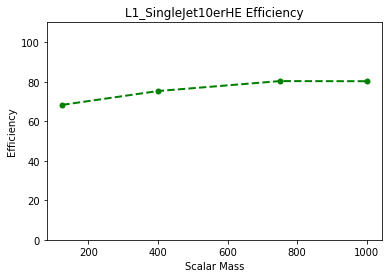

 70%|███████   | 225/321 [00:28<00:11,  8.07it/s]

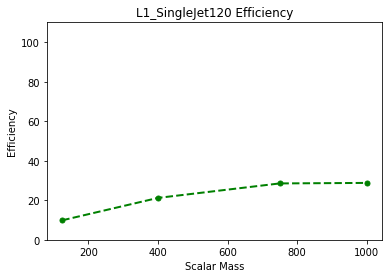

 70%|███████   | 226/321 [00:28<00:11,  8.21it/s]

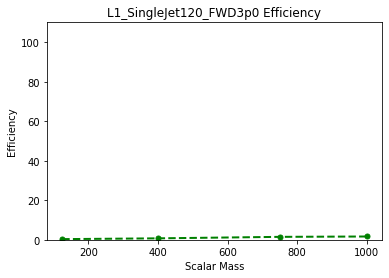

 71%|███████   | 227/321 [00:28<00:11,  8.28it/s]

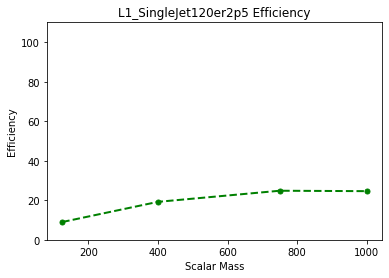

 71%|███████   | 228/321 [00:28<00:11,  8.29it/s]

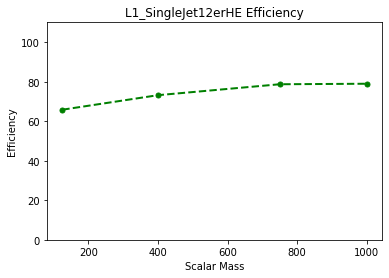

 71%|███████▏  | 229/321 [00:28<00:11,  8.33it/s]

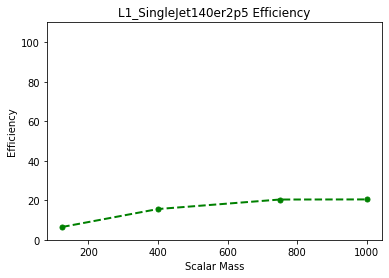

 72%|███████▏  | 230/321 [00:28<00:10,  8.35it/s]

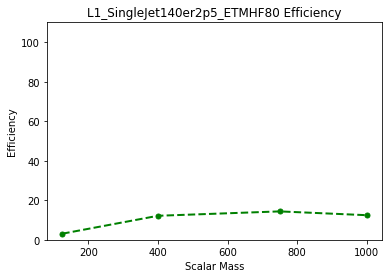

 72%|███████▏  | 231/321 [00:28<00:10,  8.30it/s]

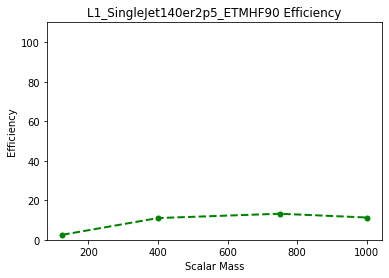

 72%|███████▏  | 232/321 [00:28<00:10,  8.28it/s]

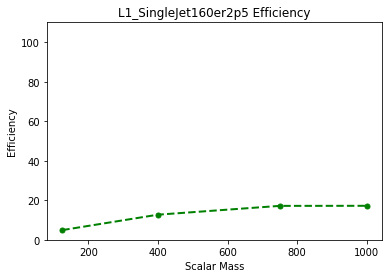

 73%|███████▎  | 233/321 [00:28<00:10,  8.30it/s]

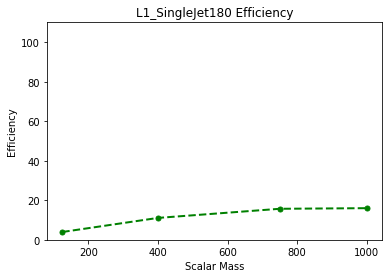

 73%|███████▎  | 234/321 [00:29<00:10,  8.36it/s]

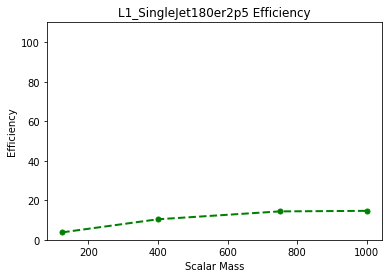

 73%|███████▎  | 235/321 [00:29<00:10,  8.38it/s]

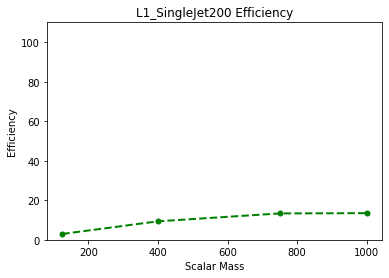

 74%|███████▎  | 236/321 [00:29<00:10,  8.39it/s]

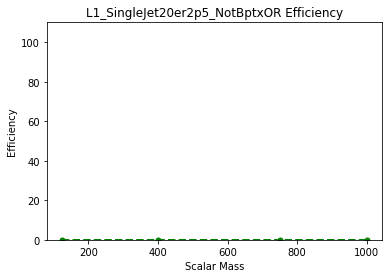

 74%|███████▍  | 237/321 [00:29<00:10,  8.31it/s]

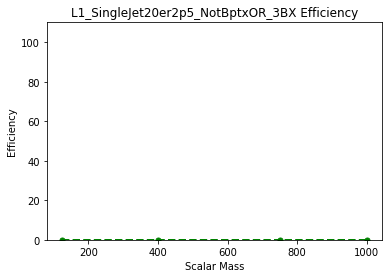

 74%|███████▍  | 238/321 [00:29<00:10,  8.23it/s]

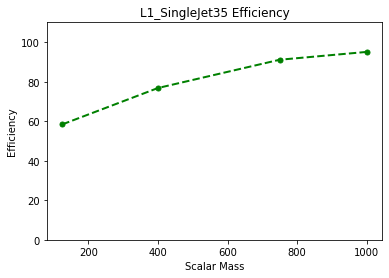

 74%|███████▍  | 239/321 [00:29<00:09,  8.30it/s]

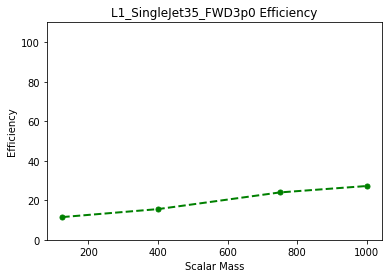

 75%|███████▍  | 240/321 [00:29<00:09,  8.32it/s]

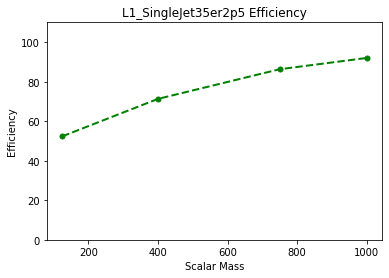

 75%|███████▌  | 241/321 [00:29<00:09,  8.33it/s]

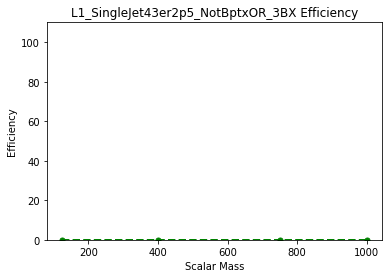

 75%|███████▌  | 242/321 [00:30<00:09,  8.29it/s]

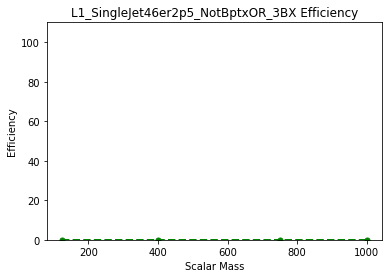

 76%|███████▌  | 243/321 [00:30<00:09,  8.23it/s]

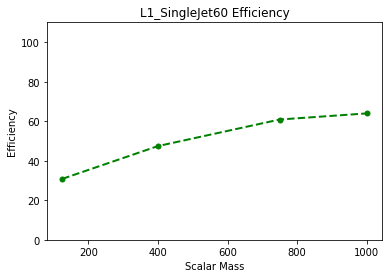

 76%|███████▌  | 244/321 [00:30<00:09,  8.27it/s]

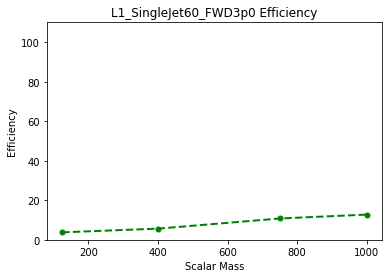

 76%|███████▋  | 245/321 [00:30<00:11,  6.66it/s]

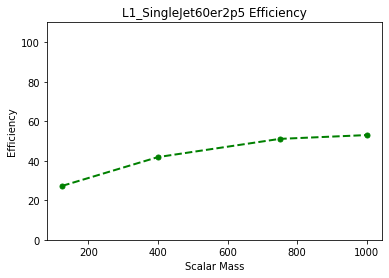

 77%|███████▋  | 246/321 [00:30<00:10,  7.09it/s]

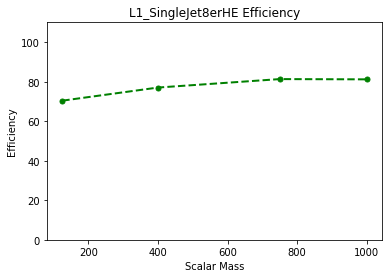

 77%|███████▋  | 247/321 [00:30<00:10,  7.38it/s]

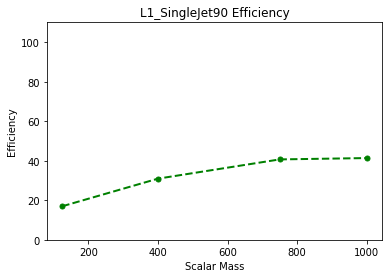

 77%|███████▋  | 248/321 [00:30<00:09,  7.64it/s]

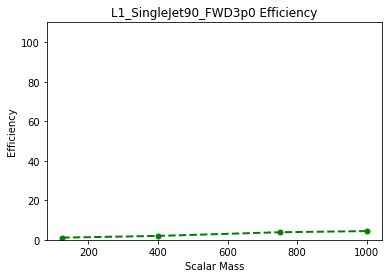

 78%|███████▊  | 249/321 [00:30<00:09,  7.82it/s]

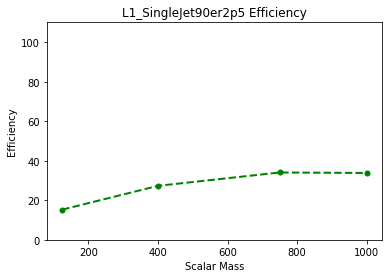

 78%|███████▊  | 250/321 [00:31<00:08,  7.99it/s]

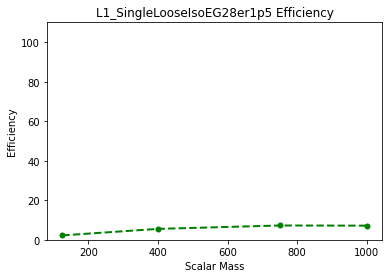

 78%|███████▊  | 251/321 [00:31<00:08,  8.08it/s]

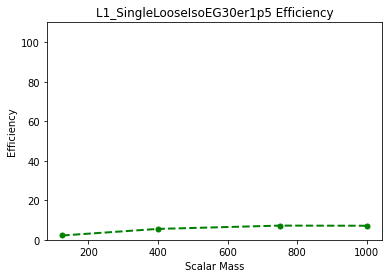

 79%|███████▊  | 252/321 [00:31<00:08,  8.15it/s]

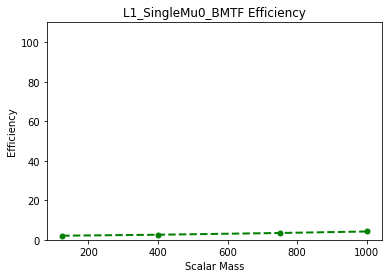

 79%|███████▉  | 253/321 [00:31<00:08,  8.24it/s]

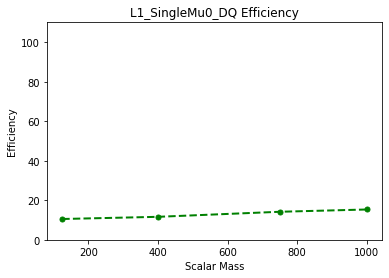

 79%|███████▉  | 254/321 [00:31<00:08,  8.30it/s]

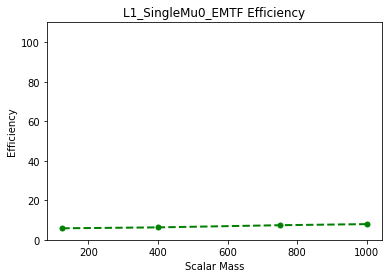

 79%|███████▉  | 255/321 [00:31<00:07,  8.34it/s]

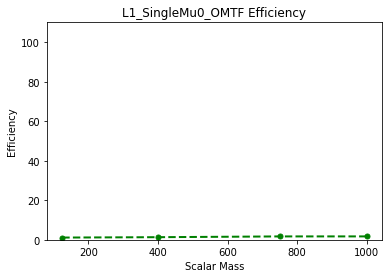

 80%|███████▉  | 256/321 [00:31<00:07,  8.37it/s]

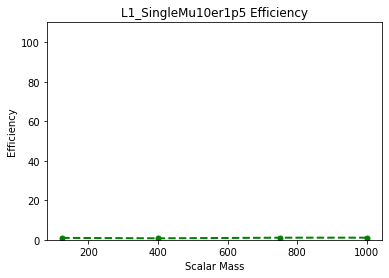

 80%|████████  | 257/321 [00:31<00:07,  8.37it/s]

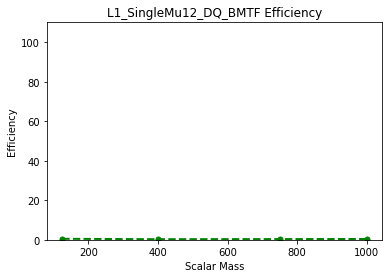

 80%|████████  | 258/321 [00:32<00:07,  8.40it/s]

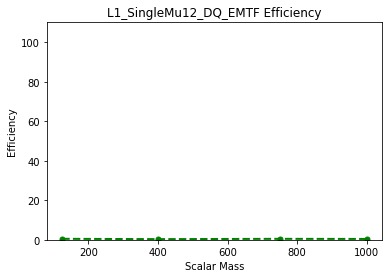

 81%|████████  | 259/321 [00:32<00:07,  8.41it/s]

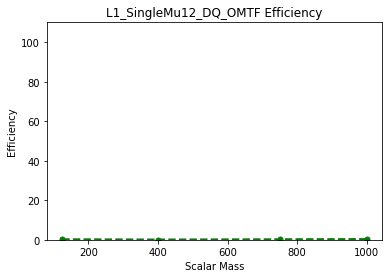

 81%|████████  | 260/321 [00:32<00:07,  8.41it/s]

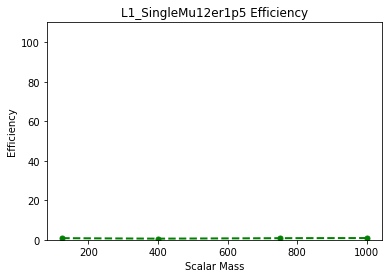

 81%|████████▏ | 261/321 [00:32<00:07,  8.45it/s]

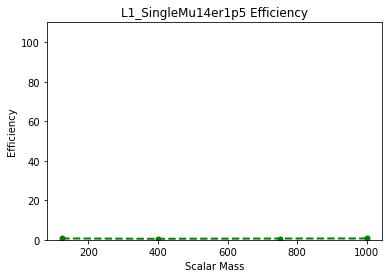

 82%|████████▏ | 262/321 [00:32<00:06,  8.45it/s]

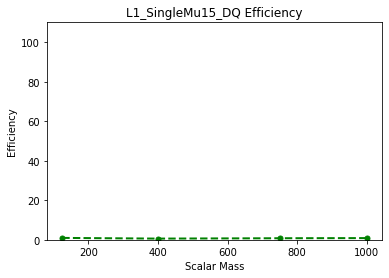

 82%|████████▏ | 263/321 [00:32<00:06,  8.49it/s]

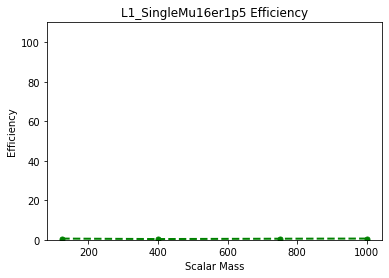

 82%|████████▏ | 264/321 [00:32<00:06,  8.50it/s]

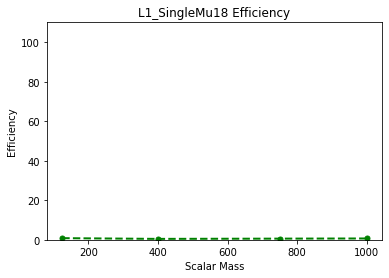

 83%|████████▎ | 265/321 [00:32<00:06,  8.54it/s]

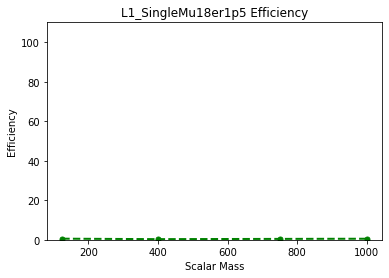

 83%|████████▎ | 266/321 [00:32<00:06,  8.54it/s]

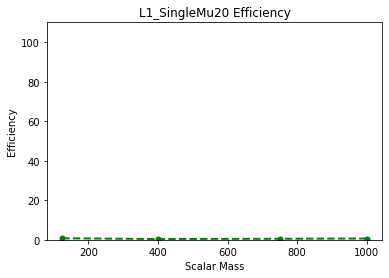

 83%|████████▎ | 267/321 [00:33<00:06,  8.54it/s]

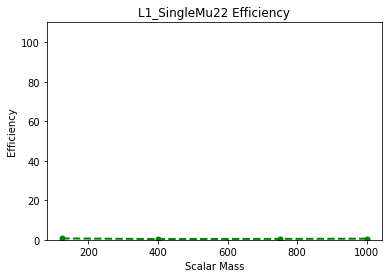

 83%|████████▎ | 268/321 [00:33<00:06,  8.56it/s]

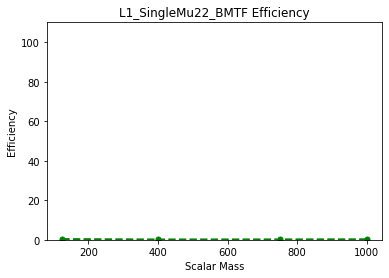

 84%|████████▍ | 269/321 [00:33<00:06,  8.56it/s]

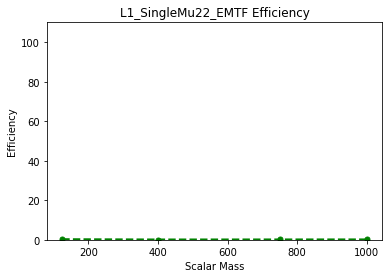

 84%|████████▍ | 270/321 [00:33<00:07,  6.83it/s]

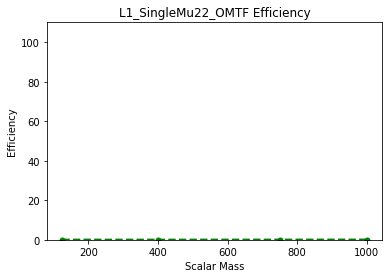

 84%|████████▍ | 271/321 [00:33<00:06,  7.26it/s]

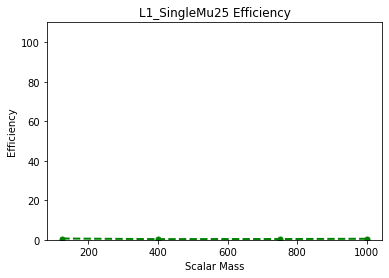

 85%|████████▍ | 272/321 [00:33<00:06,  7.61it/s]

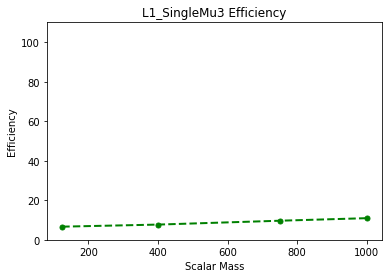

 85%|████████▌ | 273/321 [00:33<00:06,  7.88it/s]

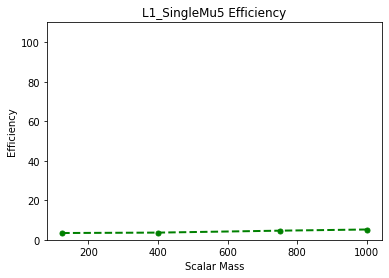

 85%|████████▌ | 274/321 [00:34<00:05,  8.08it/s]

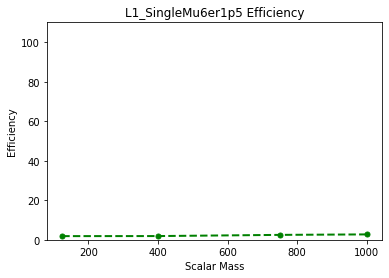

 86%|████████▌ | 275/321 [00:34<00:05,  8.20it/s]

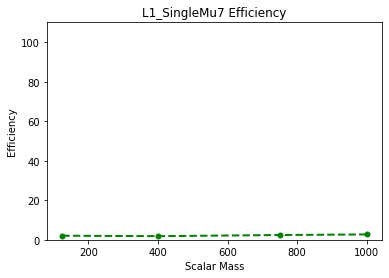

 86%|████████▌ | 276/321 [00:34<00:05,  8.31it/s]

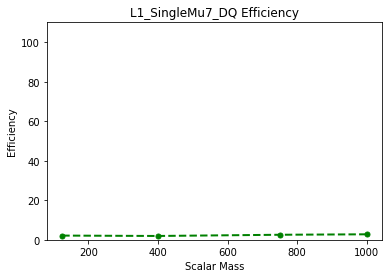

 86%|████████▋ | 277/321 [00:34<00:05,  8.37it/s]

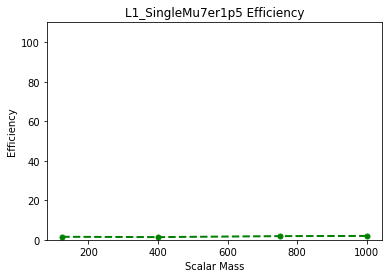

 87%|████████▋ | 278/321 [00:34<00:05,  8.41it/s]

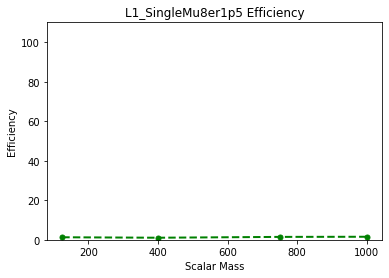

 87%|████████▋ | 279/321 [00:34<00:04,  8.43it/s]

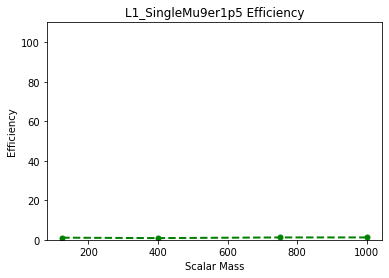

 87%|████████▋ | 280/321 [00:34<00:04,  8.44it/s]

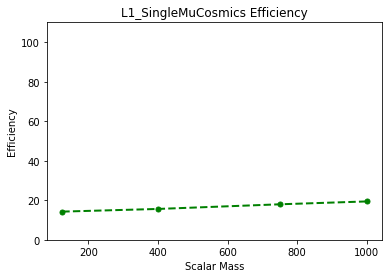

 88%|████████▊ | 281/321 [00:34<00:04,  8.43it/s]

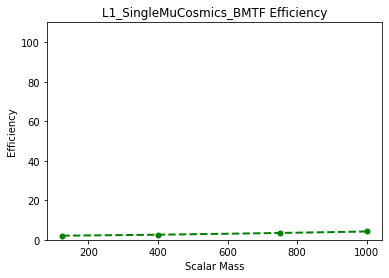

 88%|████████▊ | 282/321 [00:34<00:04,  8.42it/s]

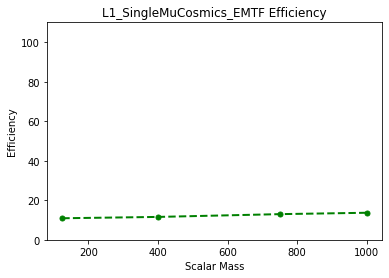

 88%|████████▊ | 283/321 [00:35<00:04,  8.41it/s]

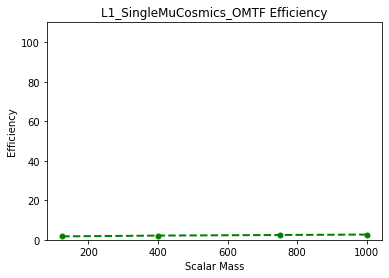

 88%|████████▊ | 284/321 [00:35<00:04,  8.38it/s]

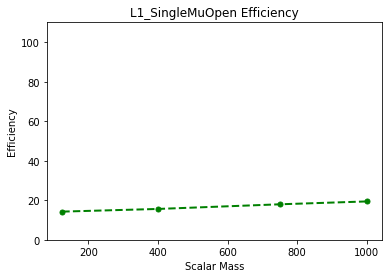

 89%|████████▉ | 285/321 [00:35<00:04,  8.44it/s]

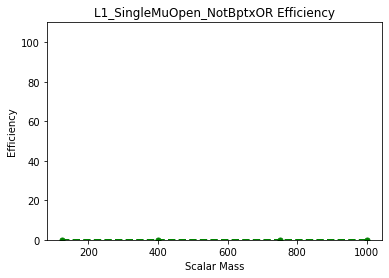

 89%|████████▉ | 286/321 [00:35<00:04,  8.41it/s]

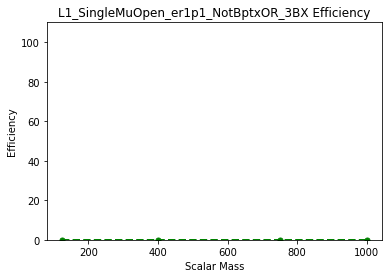

 89%|████████▉ | 287/321 [00:35<00:04,  8.33it/s]

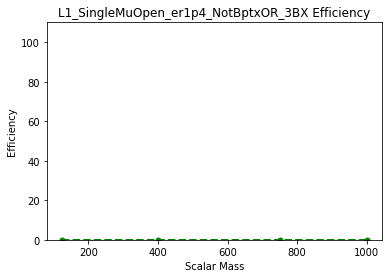

 90%|████████▉ | 288/321 [00:35<00:03,  8.27it/s]

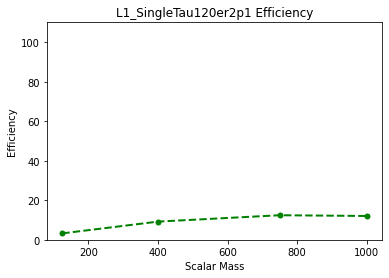

 90%|█████████ | 289/321 [00:35<00:03,  8.31it/s]

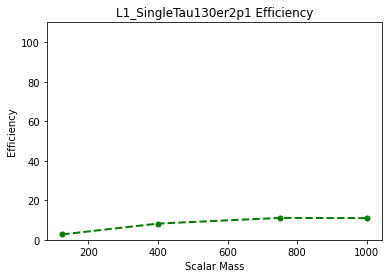

 90%|█████████ | 290/321 [00:35<00:03,  8.34it/s]

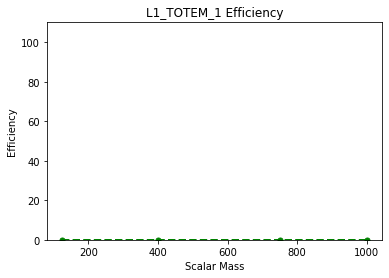

 91%|█████████ | 291/321 [00:36<00:03,  8.46it/s]

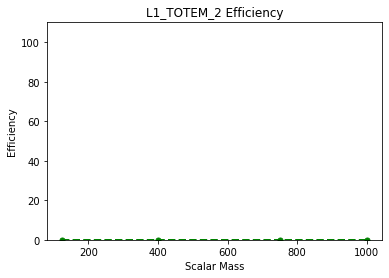

 91%|█████████ | 292/321 [00:36<00:03,  8.55it/s]

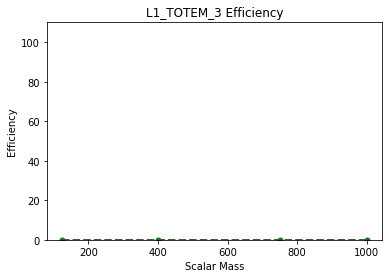

 91%|█████████▏| 293/321 [00:36<00:03,  8.61it/s]

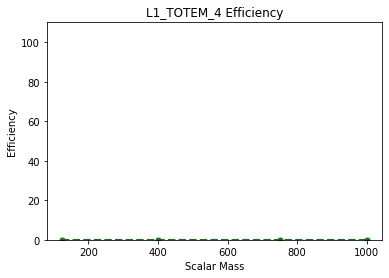

 92%|█████████▏| 294/321 [00:36<00:03,  8.65it/s]

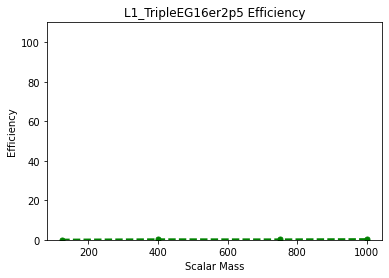

 92%|█████████▏| 295/321 [00:36<00:03,  6.88it/s]

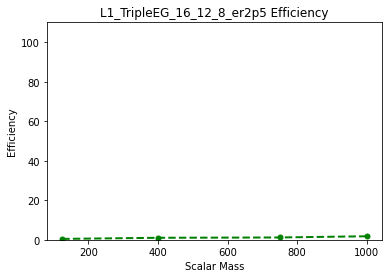

 92%|█████████▏| 296/321 [00:36<00:03,  7.25it/s]

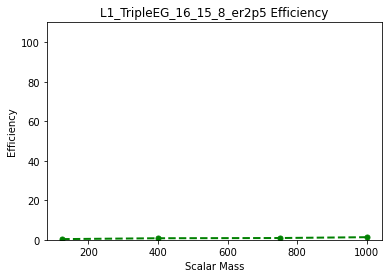

 93%|█████████▎| 297/321 [00:36<00:03,  7.56it/s]

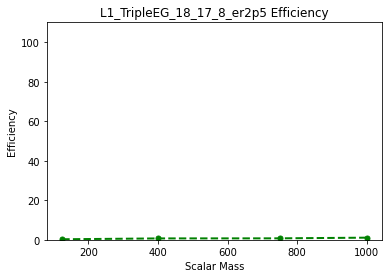

 93%|█████████▎| 298/321 [00:36<00:02,  7.75it/s]

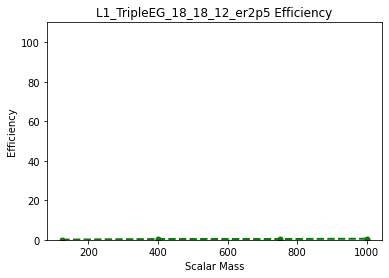

 93%|█████████▎| 299/321 [00:37<00:02,  7.91it/s]

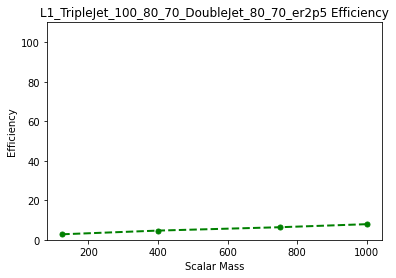

 93%|█████████▎| 300/321 [00:37<00:02,  7.92it/s]

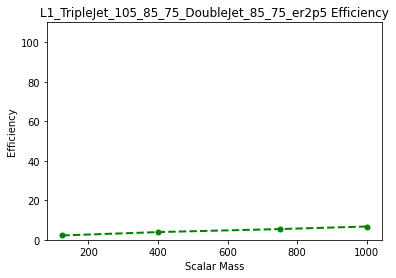

 94%|█████████▍| 301/321 [00:37<00:02,  7.89it/s]

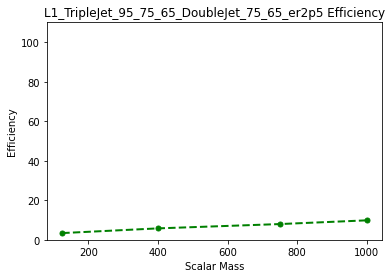

 94%|█████████▍| 302/321 [00:37<00:02,  7.92it/s]

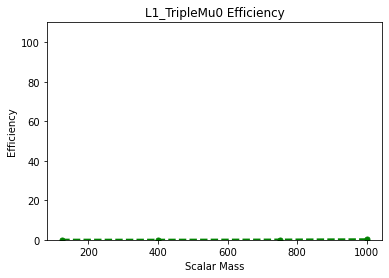

 94%|█████████▍| 303/321 [00:37<00:02,  8.13it/s]

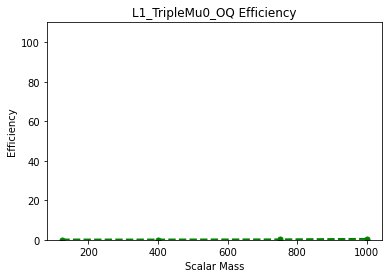

 95%|█████████▍| 304/321 [00:37<00:02,  8.25it/s]

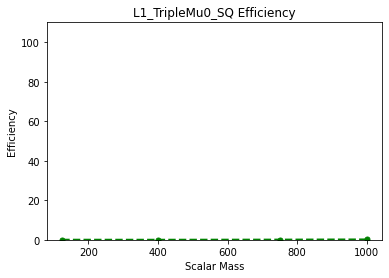

 95%|█████████▌| 305/321 [00:37<00:01,  8.32it/s]

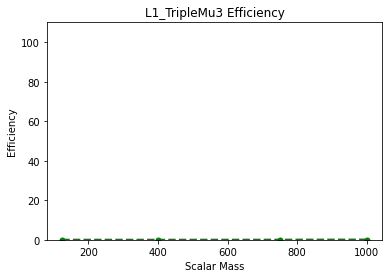

 95%|█████████▌| 306/321 [00:37<00:01,  8.42it/s]

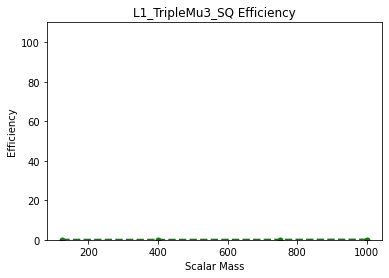

 96%|█████████▌| 307/321 [00:38<00:01,  8.46it/s]

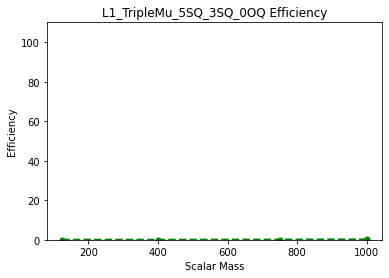

 96%|█████████▌| 308/321 [00:38<00:01,  8.41it/s]

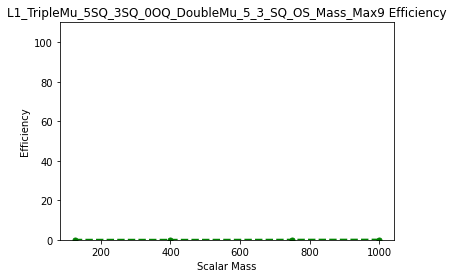

 96%|█████████▋| 309/321 [00:38<00:01,  8.19it/s]

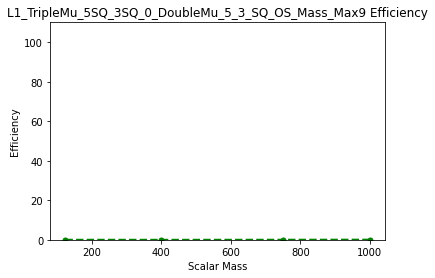

 97%|█████████▋| 310/321 [00:38<00:01,  8.07it/s]

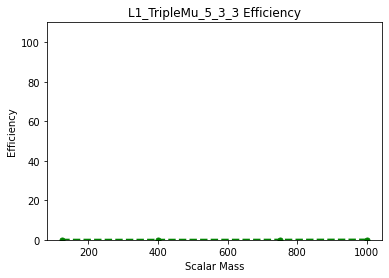

 97%|█████████▋| 311/321 [00:38<00:01,  8.18it/s]

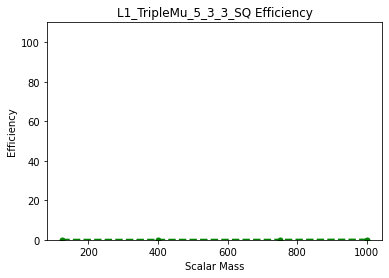

 97%|█████████▋| 312/321 [00:38<00:01,  8.22it/s]

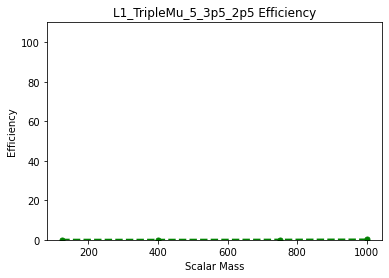

 98%|█████████▊| 313/321 [00:38<00:00,  8.28it/s]

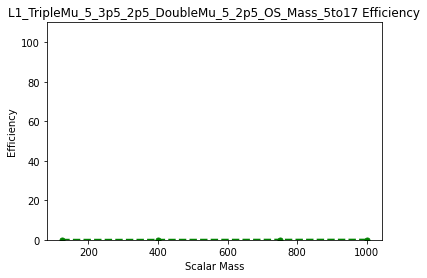

 98%|█████████▊| 314/321 [00:38<00:00,  8.15it/s]

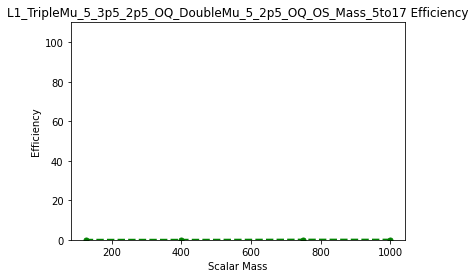

 98%|█████████▊| 315/321 [00:39<00:00,  8.02it/s]

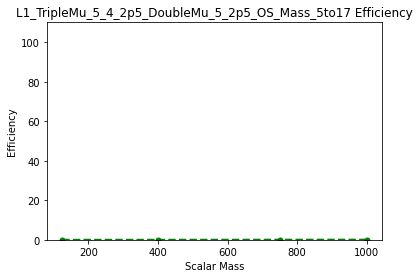

 98%|█████████▊| 316/321 [00:39<00:00,  7.99it/s]

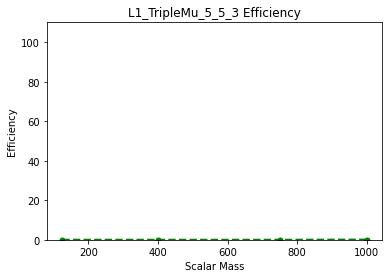

 99%|█████████▉| 317/321 [00:39<00:00,  8.13it/s]

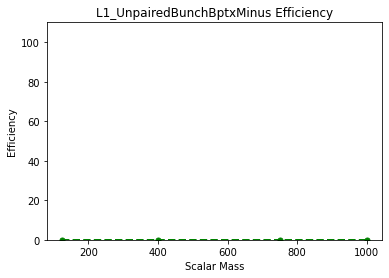

 99%|█████████▉| 318/321 [00:39<00:00,  8.20it/s]

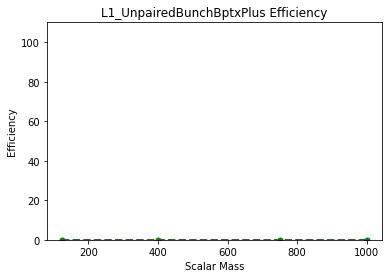

 99%|█████████▉| 319/321 [00:39<00:00,  8.19it/s]

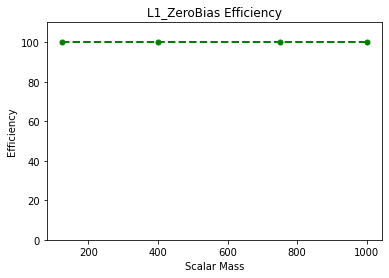

100%|█████████▉| 320/321 [00:39<00:00,  6.68it/s]

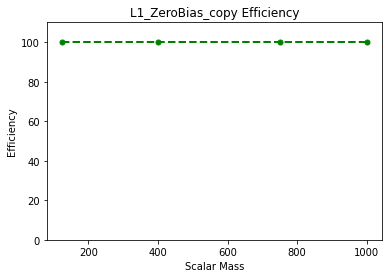

100%|██████████| 321/321 [00:39<00:00,  8.05it/s]


In [6]:
print('creating plots of trigger efficiencies.')
for trigger in tqdm(trigger_dict_125):
    x_125 = trigger_dict_125[trigger]
    ratio_125 = x_125.sum() / len(x_125) * 100.0
    x_400 = trigger_dict_400[trigger]
    ratio_400 = x_400.sum() / len(x_400) * 100.0
    x_750 = trigger_dict_750[trigger]
    ratio_750 = x_750.sum() / len(x_750) * 100.0
    x_1000 = trigger_dict_1000[trigger]
    ratio_1000 = x_1000.sum() / len(x_1000) * 100.0
    plt.plot([125,400,750,1000],[ratio_125,ratio_400,ratio_750,ratio_1000],color='green', marker='o', linestyle='dashed',
     linewidth=2, markersize=5)
    plt.xlabel('Scalar Mass')
    plt.ylabel('Efficiency')
    plt.ylim([0,110])
    plt.title('{} Efficiency'.format(trigger))
    plt.savefig('outputs/{}_eff.png'.format(trigger))
    plt.show()